# Boston - Seattle AirBnb

## 1 Business Understanding

In this notebook, I will work with two datasets (Boston and Seattle) containing AirBnb rentals data. After exploring this data, I would like to find an answer to the following questions :


> Is the geographic location an important factor for the Airbnb rental price ? I would like to show a geographic distribution of the average rental price for both cities with a choropleth map.

> I would like to build a price category classifier that will classify the expected rental price into three price categories : Low, medium and high. What are the most features that determine the rental price ? Are these the same features in both cities ?

> In which months the availability is highest ? Are these months the same in both cities ? And is there a big variation between the months ? I would like to do the same analysis but per weekday.

## 2 Data Understanding 

I will use for each city a set of three files: calendar.csv, listings.csv and reviews.csv. A detailed description each each file is done below but I will give a brief description already here:

The calendar file contains information on a day by day base of a specific house was available for rent and at which price.

The listings file is a kind of catalog file that contains detailed information (92 different parameters) about each house. Each house is defined by an id and we find the same id's back in the calendar file.

The reviews file contains the same house id and contains the different reviews that were reported for each house. I will not use this information in this notebook.


### 2.a. Load the necesarry Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score, accuracy_score
# Import supplementary visualization code visuals.py
#import visuals as vs


import geopandas as gpd
import folium

#from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

### 2.b. Load the Data

In [2]:
## load the dataframes from the csv files
df_calendarseattle = pd.read_csv('./393-43835-bundle-archive_seattle/calendar.csv')
df_reviewsseattle = pd.read_csv('./393-43835-bundle-archive_seattle/reviews.csv')
df_listingsseattle = pd.read_csv('./393-43835-bundle-archive_seattle/listings.csv')
## load the dataframes (Boston) from the csv files
df_calendarboston = pd.read_csv('./395-799891-bundle-archive_boston/calendar.csv')
df_reviewsboston = pd.read_csv('./395-799891-bundle-archive_boston/reviews.csv')
df_listingsboston = pd.read_csv('./395-799891-bundle-archive_boston/listings.csv')


## to make the choropleth map
df_seattle_zip = gpd.read_file("./Seattle_Zip_Codes/Zip_Codes.shp")
df_boston_zip = gpd.read_file("./Boston_Neighborhoods_StatAreas+2017/Boston_Neighborhoods.shp")


In [3]:
df_boston_zip.head()


OBJECTID           Name        Acres Neighborho  SqMiles    ShapeSTAre  \
0         1     Roslindale  1605.568237         15     2.51  6.993827e+07   
1         2  Jamaica Plain  2519.245394         11     3.94  1.097379e+08   
2         3   Mission Hill   350.853564         13     0.55  1.528312e+07   
3         4       Longwood   188.611947         28     0.29  8.215904e+06   
4         5    Bay Village    26.539839         33     0.04  1.156071e+06   

     ShapeSTLen                                           geometry  
0  53563.912597  MULTIPOLYGON (((-71.12593 42.27201, -71.12575 ...  
1  56349.937161  POLYGON ((-71.10499 42.32610, -71.10488 42.326...  
2  17918.724113  POLYGON ((-71.09043 42.33577, -71.09275 42.333...  
3  11908.757148  POLYGON ((-71.09811 42.33673, -71.09892 42.336...  
4   4650.635493  POLYGON ((-71.06663 42.34878, -71.06739 42.348...

In [4]:
df_boston_zip.head()

OBJECTID           Name        Acres Neighborho  SqMiles    ShapeSTAre  \
0         1     Roslindale  1605.568237         15     2.51  6.993827e+07   
1         2  Jamaica Plain  2519.245394         11     3.94  1.097379e+08   
2         3   Mission Hill   350.853564         13     0.55  1.528312e+07   
3         4       Longwood   188.611947         28     0.29  8.215904e+06   
4         5    Bay Village    26.539839         33     0.04  1.156071e+06   

     ShapeSTLen                                           geometry  
0  53563.912597  MULTIPOLYGON (((-71.12593 42.27201, -71.12575 ...  
1  56349.937161  POLYGON ((-71.10499 42.32610, -71.10488 42.326...  
2  17918.724113  POLYGON ((-71.09043 42.33577, -71.09275 42.333...  
3  11908.757148  POLYGON ((-71.09811 42.33673, -71.09892 42.336...  
4   4650.635493  POLYGON ((-71.06663 42.34878, -71.06739 42.348...

 In the next cells, to get familiar with the datasets, I will produce some high  level information about the datasets

- Datasets with the rental dates and prices

In [5]:
##rental dates Seattle
df_calendarseattle.head()

listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN

In [6]:
##rental dates Boston
df_calendarboston.head()

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

In [7]:
df_calendarseattle.shape

(1393570, 4)

In [8]:
df_calendarboston.shape

(1308890, 4)

In [9]:
df_calendarseattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [10]:
df_calendarboston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [11]:
## check the number of different houses that have been rented in Seattle

len(df_calendarseattle['listing_id'].unique())

3818

In [12]:
## check the number of different houses that have been rented in Boston

len(df_calendarboston['listing_id'].unique())


3585

In [13]:
print(df_calendarseattle[(df_calendarseattle['available'] == 'f')].shape[0])

459028


In [14]:
df_calendarseattle[(df_calendarseattle['available']== 'f') & (df_calendarseattle['price'].isnull()) ].shape[0]

459028

In [15]:
print(df_calendarboston[(df_calendarboston['available'] == 'f')].shape[0])

665853


In [16]:
print(df_calendarboston[(df_calendarboston['available'] == 'f') & (df_calendarboston['price'].isnull())].shape[0])

665853


When the availability is f(alse), the there no price available. This is true for both Boston and Seattle

- Overview of the dataset with the Airbnb reviews

In [17]:
df_reviewsseattle.head()

listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...

In [18]:
df_reviewsseattle.shape

(84849, 6)

In [19]:
df_reviewsseattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


#### Overview of the datasets with the features of the Airbnb rental offer.

In [20]:
## overview rental catalog in Seattle
df_listingsseattle.head()

id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits atop Queen Anne...   
4  Cozy family craftman house in beautiful neighb...   

                                               space  \
0  Make your self at home in this charming one-be...   
1  Beautiful, hypoallergenic apartment in an extr...   
2  Our house is modern, light and fresh with a wa...   
3                                                NaN   
4  Cozy family craftman house in beautiful neighb...   

                                         description experiences_offered  \
0  Make your self at home in this charming one-be...                none   
1  Chemically sensitive? We've removed the irrita...                none   
2  New modern house built in 2013.  Spectacular s...                none   
3  A charming apartment that sits atop Queen Anne...                none   
4  Cozy family craftman house in beautiful neighb...                none   

                               neighborhood_overview  ... review_scores_value  \
0                                                NaN  ...                10.0   
1  Queen Anne is a wonderful, truly functional vi...  ...                10.0   
2  Upper Queen Anne is a charming neighborhood fu...  ...                10.0   
3                                                NaN  ...                 NaN   
4  We are in the beautiful neighborhood of Queen ...  ...                 9.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN         WASHINGTON                f   
1                f     NaN         WASHINGTON                f   
2                f     NaN         WASHINGTON                f   
3                f     NaN         WASHINGTON                f   
4                f     NaN         WASHINGTON                f   

  cancellation_policy  require_guest_profile_picture  \
0            moderate                              f   
1              strict                              t   
2              strict                              f   
3            flexible                              f   
4              strict                              f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              2   
1                                t                              6   
2                                f                              2   
3                                f                              1   
4                                f                              1   

  reviews_per_month  
0              4.07  
1              1.48  
2              1.15  
3               NaN  
4              0.89  

[5 rows x 92 columns]

In [21]:
df_listingsseattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [22]:
df_listingsseattle.shape

(3818, 92)

In [23]:
df_listingsboston.head()

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  ... review_scores_value  \
0  Roslindale is quiet, convenient and friendly. ...  ...                 NaN   
1  The room is in Roslindale, a diverse and prima...  ...                 9.0   
2  The LOCATION: Roslindale is a safe and diverse...  ...                10.0   
3  Roslindale is a lovely little neighborhood loc...  ...                10.0   
4  I love the proximity to downtown, the neighbor...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN                NaN                f   
1                f     NaN                NaN                t   
2                f     NaN                NaN                f   
3                f     NaN                NaN                f   
4                f     NaN                NaN                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1            moderate                             f   
2            moderate                             t   
3            moderate                             f   
4            flexible                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

   reviews_per_month  
0                NaN  
1               1.30  
2               0.47  
3               1.00  
4               2.25  

[5 rows x 95 columns]

In [24]:
df_listingsboston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [25]:
df_listingsboston.shape

(3585, 95)

This is the same value as there are unique id's in the calendarseattle dataset

#### Overview of the datasets with the zipcodes and geographical coordinates. This datasets will be used to construct the Seattle and Boston choropleth map

In [26]:
## Seattle geospatial data
df_seattle_zip.head()

OBJECTID    ZIP ZIPCODE COUNTY     SHAPE_Leng    SHAPE_Area  \
0         1  98031   98031    033  117508.211718  2.280129e+08   
1         2  98032   98032    033  166737.664791  4.826754e+08   
2         3  98033   98033    033  101363.840369  2.566747e+08   
3         4  98034   98034    033   98550.452509  2.725072e+08   
4         5  98030   98030    033   94351.264837  2.000954e+08   

                                            geometry  
0  POLYGON ((-122.21842 47.43750, -122.21935 47.4...  
1  MULTIPOLYGON (((-122.24187 47.44122, -122.2411...  
2  POLYGON ((-122.20571 47.65170, -122.20511 47.6...  
3  POLYGON ((-122.17551 47.73706, -122.17554 47.7...  
4  POLYGON ((-122.16746 47.38549, -122.16746 47.3...

The choropleth map for Seattle wil be based on the ZIPCODE column

In [27]:
df_seattle_zip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
OBJECTID      204 non-null int64
ZIP           204 non-null int64
ZIPCODE       204 non-null object
COUNTY        203 non-null object
SHAPE_Leng    204 non-null float64
SHAPE_Area    204 non-null float64
geometry      204 non-null geometry
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 11.3+ KB


In [28]:
df_seattle_zip.shape

(204, 7)

In [29]:
## Boston geospatial data
df_boston_zip.head()


OBJECTID           Name        Acres Neighborho  SqMiles    ShapeSTAre  \
0         1     Roslindale  1605.568237         15     2.51  6.993827e+07   
1         2  Jamaica Plain  2519.245394         11     3.94  1.097379e+08   
2         3   Mission Hill   350.853564         13     0.55  1.528312e+07   
3         4       Longwood   188.611947         28     0.29  8.215904e+06   
4         5    Bay Village    26.539839         33     0.04  1.156071e+06   

     ShapeSTLen                                           geometry  
0  53563.912597  MULTIPOLYGON (((-71.12593 42.27201, -71.12575 ...  
1  56349.937161  POLYGON ((-71.10499 42.32610, -71.10488 42.326...  
2  17918.724113  POLYGON ((-71.09043 42.33577, -71.09275 42.333...  
3  11908.757148  POLYGON ((-71.09811 42.33673, -71.09892 42.336...  
4   4650.635493  POLYGON ((-71.06663 42.34878, -71.06739 42.348...

The cloropleth map for boston will be based on the Name column (neighbourhood)

In [30]:
df_boston_zip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
OBJECTID      26 non-null int64
Name          26 non-null object
Acres         26 non-null float64
Neighborho    26 non-null object
SqMiles       26 non-null float64
ShapeSTAre    26 non-null float64
ShapeSTLen    26 non-null float64
geometry      26 non-null geometry
dtypes: float64(4), geometry(1), int64(1), object(2)
memory usage: 1.8+ KB


Both the Boston and Seattle geospatial dataset seem to be ok

## 3. Prepare the Data

### 3.1 Missing Values

I will use only a limited number of columns of the df_listingsseattle and df_listingsboston datasets.
These columns have been selected in two ways : Intuitively and based on their content after an examination.
I n this section of the workbook, I will do basically the following:

1) Fill in the missing prices values (actual price) in the df_calendarseattle and df_calendarboston dataframes with their catalog value of the df_listingsseattle and df_listingsboston datasets.

2) Fill in  the missing zipcodes (based on the neighbourhood)

3) Fill in the missing bedrooms ad bathroom values. (Estimation based on the number of people the house can accommodate).

4) Fill in the property_type missing values based on the same criterium.

5) Fill in the missing review_scores_cleanliness (the average is applied)
                                 

In [31]:
## make the copie of the datasets
## Seattle dataset
classifier_data = df_listingsseattle.copy()
## Boston dataset
classifier_data_b = df_listingsboston.copy()
## drop the columns which are not needed to build the classifier
classifier_data = classifier_data[['id','review_scores_cleanliness','cancellation_policy','number_of_reviews','zipcode','neighbourhood_cleansed','accommodates','bedrooms','bathrooms','room_type','property_type'
                                   ,'price']]
classifier_data_b = classifier_data_b[['id','review_scores_cleanliness','cancellation_policy','number_of_reviews','zipcode','neighbourhood_cleansed','accommodates','bedrooms','bathrooms','room_type','property_type'
                                   ,'price']]




#### 3.1.1 Fill in the  missing prices 

In [32]:
def merge_rename(dataframe1,dataframe2):
    """
    This function merges two dataframes, renames in the merged dataframe one column to its original name before the merger
    and deletes a number a columns.
    """
    dataframe1 = dataframe1.merge(dataframe2,  how='left', left_on="listing_id", right_on="id")
    ## the merger creates the price_x and price_y columns, I rename price_x again to its original name
    dataframe1 = dataframe1.rename(columns={'price_x':'price_calendar','price_y':'price_listing'})
    ## I want to keep only the following columns
    dataframe1 = dataframe1[['id','date','available','price_calendar','price_listing','property_type']]
    return dataframe1
    




In [33]:
## call the merge_rename function for the Seattle calendar data
df_calendarseattle  = merge_rename(df_calendarseattle, df_listingsseattle)

In [34]:
## call the merge_rename function for the Boston calendar data
df_calendarboston = merge_rename(df_calendarboston, df_listingsboston)

In [35]:
df_calendarseattle.head()

id        date available price_calendar price_listing property_type
0  241032  2016-01-04         t         $85.00        $85.00     Apartment
1  241032  2016-01-05         t         $85.00        $85.00     Apartment
2  241032  2016-01-06         f            NaN        $85.00     Apartment
3  241032  2016-01-07         f            NaN        $85.00     Apartment
4  241032  2016-01-08         f            NaN        $85.00     Apartment

In [36]:
df_calendarboston.head()

id        date available price_calendar price_listing property_type
0  12147973  2017-09-05         f            NaN       $250.00         House
1  12147973  2017-09-04         f            NaN       $250.00         House
2  12147973  2017-09-03         f            NaN       $250.00         House
3  12147973  2017-09-02         f            NaN       $250.00         House
4  12147973  2017-09-01         f            NaN       $250.00         House

In [37]:
df_calendarseattle.shape

(1393570, 6)

In [38]:
df_calendarseattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 6 columns):
id                1393570 non-null int64
date              1393570 non-null object
available         1393570 non-null object
price_calendar    934542 non-null object
price_listing     1393570 non-null object
property_type     1393205 non-null object
dtypes: int64(1), object(5)
memory usage: 74.4+ MB


In [39]:
def lookprice(x,y):
    """
    Input of this function: the value of the columns price_x and price_y
    Output : depending on the fact that the price_x value isnull or not,
    it will return price_x or price_y
    """
    if(pd.notnull(x)):
    
        return x
    else:
        return y
    

In [40]:
##Call the function lookprice for seattle (reple the null values)
## I will create an extra price field and leave the original price_x field intact
df_calendarseattle['price_adj'] = df_calendarseattle[['price_calendar','price_listing']].apply(lambda x:lookprice(x[0],x[1]),axis = 1)




In [41]:
df_calendarseattle.head(100)

id        date available price_calendar price_listing property_type  \
0   241032  2016-01-04         t         $85.00        $85.00     Apartment   
1   241032  2016-01-05         t         $85.00        $85.00     Apartment   
2   241032  2016-01-06         f            NaN        $85.00     Apartment   
3   241032  2016-01-07         f            NaN        $85.00     Apartment   
4   241032  2016-01-08         f            NaN        $85.00     Apartment   
..     ...         ...       ...            ...           ...           ...   
95  241032  2016-04-08         t         $85.00        $85.00     Apartment   
96  241032  2016-04-09         t         $85.00        $85.00     Apartment   
97  241032  2016-04-10         t         $85.00        $85.00     Apartment   
98  241032  2016-04-11         t         $85.00        $85.00     Apartment   
99  241032  2016-04-12         t         $85.00        $85.00     Apartment   

   price_adj  
0     $85.00  
1     $85.00  
2     $85.00  
3     $85.00  
4     $85.00  
..       ...  
95    $85.00  
96    $85.00  
97    $85.00  
98    $85.00  
99    $85.00  

[100 rows x 7 columns]

In [42]:
df_calendarseattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 7 columns):
id                1393570 non-null int64
date              1393570 non-null object
available         1393570 non-null object
price_calendar    934542 non-null object
price_listing     1393570 non-null object
property_type     1393205 non-null object
price_adj         1393570 non-null object
dtypes: int64(1), object(6)
memory usage: 85.1+ MB


In [43]:
df_calendarboston.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308890 entries, 0 to 1308889
Data columns (total 6 columns):
id                1308890 non-null int64
date              1308890 non-null object
available         1308890 non-null object
price_calendar    643037 non-null object
price_listing     1308890 non-null object
property_type     1307795 non-null object
dtypes: int64(1), object(5)
memory usage: 69.9+ MB


In [44]:
df_calendarboston.head()

id        date available price_calendar price_listing property_type
0  12147973  2017-09-05         f            NaN       $250.00         House
1  12147973  2017-09-04         f            NaN       $250.00         House
2  12147973  2017-09-03         f            NaN       $250.00         House
3  12147973  2017-09-02         f            NaN       $250.00         House
4  12147973  2017-09-01         f            NaN       $250.00         House

In [45]:
##Call the function lookprice for seattle (reple the null values)
df_calendarboston['price_adj'] = df_calendarboston[['price_calendar','price_listing']].apply(lambda x:lookprice(x[0],x[1]),axis = 1)


In [46]:
df_calendarboston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308890 entries, 0 to 1308889
Data columns (total 7 columns):
id                1308890 non-null int64
date              1308890 non-null object
available         1308890 non-null object
price_calendar    643037 non-null object
price_listing     1308890 non-null object
property_type     1307795 non-null object
price_adj         1308890 non-null object
dtypes: int64(1), object(6)
memory usage: 79.9+ MB


#### 3.1.2 Fill in the missing zipcodes

In [47]:
## to have a idea about the missing values per column (Seattle)
classifier_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 12 columns):
id                           3818 non-null int64
review_scores_cleanliness    3165 non-null float64
cancellation_policy          3818 non-null object
number_of_reviews            3818 non-null int64
zipcode                      3811 non-null object
neighbourhood_cleansed       3818 non-null object
accommodates                 3818 non-null int64
bedrooms                     3812 non-null float64
bathrooms                    3802 non-null float64
room_type                    3818 non-null object
property_type                3817 non-null object
price                        3818 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 358.1+ KB


In [48]:
## to have a idea about the missing values per column (Boston)
classifier_data_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 12 columns):
id                           3585 non-null int64
review_scores_cleanliness    2767 non-null float64
cancellation_policy          3585 non-null object
number_of_reviews            3585 non-null int64
zipcode                      3547 non-null object
neighbourhood_cleansed       3585 non-null object
accommodates                 3585 non-null int64
bedrooms                     3575 non-null float64
bathrooms                    3571 non-null float64
room_type                    3585 non-null object
property_type                3582 non-null object
price                        3585 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 336.2+ KB


In [49]:
def get_zipcode(x):
    """
    The input of this function are the fields 'neighbourhood_cleansed'
    The return is a zipcode for the empty field 'zipcode'
    The values are based on the zipcodes found for the neighbourhood in both dataframes
    """

    

    if x == 'West Woodland':
        return '91107'
    if x == 'North Queen Anne':
        return '98119'
    if x == 'Leschi':
        return '98144'
    if x == 'Yesler Terrace':
        return '98122'
    if x == 'Interbay':
        return '98199'
    if x == 'Portage Bay':
        return '98102'
    if x == 'Broadway':
        return '98122'
    if x == 'Dorchester':
        return '02125'
    if x == 'South End':
        return '02118'
    if x == 'East Boston':
        return '02128'
    if x == 'Fenway':
        return '02215'
    if x == 'Back Bay':
        return '02116'
    if x == 'Jamaica Plain':
        return '02130'
    if x == 'North End':
        return '02113'
    if x == 'Downtown':
        return '02111'
    if x == 'Longwood Medical Area':
        return '02215'
    if x == 'South Boston Waterfront':
        return '02210'
    if x == 'Brighton':
        return '02135'
    if x == 'Allston':
        return '02134'
    if x == 'Roxbury':
        return '02119'
    if x == 'Roslindale':
        return '02131'
    if x == 'South Boston':
        return '02127'
    if x == 'Mission Hill':
        return '02120'                                       

In [50]:
df_zipcode = classifier_data[classifier_data['zipcode'].isnull()]
df_zipcode_b = classifier_data_b[classifier_data_b['zipcode'].isnull()]



In [51]:
df_zipcode['zipcode'] = df_zipcode['neighbourhood_cleansed'].apply(get_zipcode)
df_zipcode_b['zipcode'] = df_zipcode_b['neighbourhood_cleansed'].apply(get_zipcode)


/Users/benedictusvanhoof/anaconda3/envs/denbenny/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/benedictusvanhoof/anaconda3/envs/denbenny/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [52]:
## The zipcodes are filled in now
df_zipcode.head(10)

id  review_scores_cleanliness cancellation_policy  \
162   2039149                        9.0              strict   
479    610989                       10.0              strict   
988   4172364                       10.0            flexible   
1672  8355276                        8.0            flexible   
1917  2134911                        9.0              strict   
2521  2332949                        9.0              strict   
2671  9774404                        NaN            flexible   

      number_of_reviews zipcode neighbourhood_cleansed  accommodates  \
162                 121   91107          West Woodland            10   
479                   1   98119       North Queen Anne             2   
988                  33   98144                 Leschi             2   
1672                 14   98122         Yesler Terrace             3   
1917                  5   98199               Interbay             1   
2521                 38   98102            Portage Bay            10   
2671                  0   98122               Broadway             2   

      bedrooms  bathrooms        room_type    property_type    price  
162        3.0        2.0  Entire home/apt            House  $225.00  
479        1.0        1.0     Private room  Bed & Breakfast  $209.00  
988        1.0        2.0     Private room            House   $55.00  
1672       0.0        1.0  Entire home/apt        Apartment   $65.00  
1917       1.0        1.0     Private room             Boat   $95.00  
2521       4.0        3.0  Entire home/apt            House  $380.00  
2671       0.0        1.0  Entire home/apt        Apartment  $100.00

In [53]:
## The zipcodes are filled in now
df_zipcode_b.head(10)

id  review_scores_cleanliness cancellation_policy  \
3     1436513                       10.0            moderate   
94    2538536                        9.0            flexible   
162  13512551                       10.0              strict   
226  12789527                       10.0            moderate   
494  14336348                       10.0            moderate   
655  14808548                        NaN            moderate   
675   2043541                        9.0              strict   
740  11229070                       10.0            moderate   
882  13077603                       10.0            flexible   
948  14918869                        NaN            flexible   

     number_of_reviews zipcode neighbourhood_cleansed  accommodates  bedrooms  \
3                    1   02131             Roslindale             4       1.0   
94                  17   02130          Jamaica Plain             3       1.0   
162                  1   02130          Jamaica Plain             6       4.0   
226                  1   02130          Jamaica Plain             2       1.0   
494                  1   02120           Mission Hill             1       1.0   
655                  0   02113              North End             3       1.0   
675                 37   02113              North End             6       2.0   
740                 32   02113              North End             2       1.0   
882                  9   02119                Roxbury             1       1.0   
948                  0   02118              South End             1       1.0   

     bathrooms        room_type property_type    price  
3          1.0     Private room         House   $75.00  
94         1.0  Entire home/apt     Apartment  $149.00  
162        2.5  Entire home/apt         House  $199.00  
226        1.0     Private room     Apartment  $100.00  
494        1.0     Private room     Apartment   $99.00  
655        1.0     Private room     Apartment  $102.00  
675        1.0  Entire home/apt     Apartment  $195.00  
740        1.0     Private room     Apartment   $95.00  
882        1.5     Private room     Apartment   $35.00  
948        1.0      Shared room     Apartment   $60.00

In [54]:
## Delete the lines with an empty zipcode from the dataframe
classifier_data = classifier_data[classifier_data['zipcode'].notnull()]
classifier_data_b = classifier_data_b[classifier_data_b['zipcode'].notnull()]

In [55]:
## The lines with the corrected zipcodes are attached to the dataframes
## For Seattle
classifier_data = classifier_data.append(df_zipcode)
## For Boston
classifier_data_b = classifier_data_b.append(df_zipcode_b)

#### 3.1.3 Fill in the missing review_scores_cleanliness

In [56]:
## Fill the empty values in the review_scores_cleanliness column with the average value of this column
## The average score seems a good replacement value to me

classifier_data['review_scores_cleanliness']=classifier_data['review_scores_cleanliness'].fillna(classifier_data['review_scores_cleanliness'].mean())
classifier_data_b['review_scores_cleanliness']=classifier_data_b['review_scores_cleanliness'].fillna(classifier_data_b['review_scores_cleanliness'].mean())







In [57]:
## The number of empty values is checked again
classifier_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 2671
Data columns (total 12 columns):
id                           3818 non-null int64
review_scores_cleanliness    3818 non-null float64
cancellation_policy          3818 non-null object
number_of_reviews            3818 non-null int64
zipcode                      3818 non-null object
neighbourhood_cleansed       3818 non-null object
accommodates                 3818 non-null int64
bedrooms                     3812 non-null float64
bathrooms                    3802 non-null float64
room_type                    3818 non-null object
property_type                3817 non-null object
price                        3818 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 387.8+ KB


In [58]:
## The number of empty values is checked again
classifier_data_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3561
Data columns (total 12 columns):
id                           3585 non-null int64
review_scores_cleanliness    3585 non-null float64
cancellation_policy          3585 non-null object
number_of_reviews            3585 non-null int64
zipcode                      3585 non-null object
neighbourhood_cleansed       3585 non-null object
accommodates                 3585 non-null int64
bedrooms                     3575 non-null float64
bathrooms                    3571 non-null float64
room_type                    3585 non-null object
property_type                3582 non-null object
price                        3585 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 364.1+ KB


#### 3.1.4 Fill in the missing bedrooms and bathrooms

I will solve the empty bathroom values in Seattle first

In [59]:
## let's have a look at the missing values in the bathrooms columns for Seattle
no_bathroom = classifier_data[classifier_data['bathrooms'].isnull()]
no_bathroom.head(20)


id  review_scores_cleanliness cancellation_policy  \
1242   19611                   9.000000              strict   
1314   59827                   9.000000              strict   
1357   19623                   9.000000              strict   
1378  224763                  10.000000              strict   
1961  609252                   9.556398            flexible   
1975  716829                   6.000000            flexible   
2048  354453                   9.556398              strict   
2096  143580                   9.000000            moderate   
2306  774659                  10.000000            moderate   
2408   10385                  10.000000            moderate   
2432   11411                  10.000000            moderate   
2437   10695                  10.000000            moderate   
2698  387078                  10.000000              strict   
2717  745099                   9.556398            flexible   
2953  387079                  10.000000              strict   
3337  704477                   9.556398            flexible   

      number_of_reviews zipcode neighbourhood_cleansed  accommodates  \
1242                 26   98121               Belltown             4   
1314                 13   98121               Belltown             4   
1357                 38   98121               Belltown             6   
1378                 27   98121               Belltown             4   
1961                  0   98117              Greenwood             4   
1975                  1   98103              Greenwood             1   
2048                  0   98103              Greenwood             4   
2096                238   98144      North Beacon Hill             2   
2306                 40   98118            Mount Baker             3   
2408                 74   98115             Maple Leaf             2   
2432                 47   98115             Maple Leaf             2   
2437                 12   98115             Maple Leaf             4   
2698                 52   98102               Broadway             4   
2717                  0   98102               Broadway             1   
2953                 41   98102               Broadway             4   
3337                  0   98133     North College Park             2   

      bedrooms  bathrooms        room_type property_type    price  
1242       1.0        NaN  Entire home/apt     Apartment  $107.00  
1314       1.0        NaN  Entire home/apt     Apartment  $135.00  
1357       2.0        NaN  Entire home/apt     Apartment  $186.00  
1378       1.0        NaN  Entire home/apt     Apartment  $149.00  
1961       1.0        NaN     Private room         House  $280.00  
1975       1.0        NaN     Private room        Chalet   $62.00  
2048       2.0        NaN  Entire home/apt         House  $150.00  
2096       1.0        NaN     Private room         House   $75.00  
2306       1.0        NaN  Entire home/apt         House  $105.00  
2408       1.0        NaN     Private room         House   $60.00  
2432       1.0        NaN     Private room         House   $60.00  
2437       1.0        NaN     Private room         House  $109.00  
2698       1.0        NaN  Entire home/apt     Apartment  $119.00  
2717       1.0        NaN     Private room         House   $75.00  
2953       1.0        NaN  Entire home/apt     Apartment  $119.00  
3337       2.0        NaN  Entire home/apt         House   $99.00

I will fill in 1 bathroom for the accomodates smaller than 6 lines and two bathrooms for the single line were accommodates is 6.

In [60]:
no_bathroom['bathrooms'] = no_bathroom['bathrooms'].replace(np.nan,1 )

/Users/benedictusvanhoof/anaconda3/envs/denbenny/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
## Delete the lines with unknown number of bathrooms from the classifier dataset
classifier_data = classifier_data[classifier_data['bathrooms'].notnull()]


In [62]:
classifier_data = classifier_data.append(no_bathroom)

In [63]:
## let's have a look at the missing values in the bathrooms columns for Boston
no_bathroom_b = classifier_data_b[classifier_data_b['bathrooms'].isnull()]
no_bathroom_b.head(20)


id  review_scores_cleanliness cancellation_policy  \
103     777903                   9.000000            moderate   
630     822063                   9.258041            flexible   
755    1426754                   9.000000              strict   
800     276450                   9.000000              strict   
820   12627225                   5.000000              strict   
825   12857811                   5.000000            flexible   
888     658029                   9.000000              strict   
910   12796808                   9.258041            flexible   
989     225224                   8.000000            moderate   
1120     22354                   8.000000            moderate   
2196     67946                  10.000000     super_strict_30   
2201     25142                  10.000000     super_strict_30   
2785   1391215                   9.000000            moderate   
2819   9239190                   9.000000            flexible   

      number_of_reviews zipcode neighbourhood_cleansed  accommodates  \
103                  17   02130          Jamaica Plain             2   
630                   0   02113              North End             1   
755                  73   02108              North End             2   
800                  54   02118                Roxbury             4   
820                  10   02125                Roxbury             2   
825                  14   02125                Roxbury             2   
888                  65   02118                Roxbury             4   
910                   0   02119                Roxbury             1   
989                 184   02116              South End             1   
1120                215   02116              South End             1   
2196                  1   02115                 Fenway             3   
2201                  9   02215                 Fenway             4   
2785                111   02122             Dorchester             2   
2819                 12   02124             Dorchester             2   

      bedrooms  bathrooms        room_type    property_type    price  
103        1.0        NaN     Private room            House   $85.00  
630        1.0        NaN      Shared room        Apartment   $35.00  
755        1.0        NaN  Entire home/apt        Apartment   $99.00  
800        1.0        NaN  Entire home/apt        Apartment  $167.00  
820        1.0        NaN     Private room  Bed & Breakfast   $60.00  
825        1.0        NaN     Private room            House   $60.00  
888        1.0        NaN  Entire home/apt        Apartment  $163.00  
910        1.0        NaN     Private room        Apartment   $53.00  
989        1.0        NaN     Private room            House   $98.00  
1120       1.0        NaN     Private room  Bed & Breakfast  $135.00  
2196       1.0        NaN     Private room        Apartment  $249.00  
2201       2.0        NaN  Entire home/apt        Apartment  $349.00  
2785       1.0        NaN     Private room            House   $50.00  
2819       1.0        NaN     Private room            House   $57.00

I will also fill in 1 bathroom (the number of accomodates is max 4)

In [64]:
no_bathroom_b['bathrooms'].replace(np.nan,1, inplace = True )

/Users/benedictusvanhoof/anaconda3/envs/denbenny/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [65]:
## Delete the lines with unknown number of bathrooms from the classifier dataset
classifier_data_b = classifier_data_b[classifier_data_b['bathrooms'].notnull()]

In [66]:
classifier_data_b = classifier_data_b.append(no_bathroom_b)

In [67]:
classifier_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3337
Data columns (total 12 columns):
id                           3818 non-null int64
review_scores_cleanliness    3818 non-null float64
cancellation_policy          3818 non-null object
number_of_reviews            3818 non-null int64
zipcode                      3818 non-null object
neighbourhood_cleansed       3818 non-null object
accommodates                 3818 non-null int64
bedrooms                     3812 non-null float64
bathrooms                    3818 non-null float64
room_type                    3818 non-null object
property_type                3817 non-null object
price                        3818 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 387.8+ KB


In [68]:
classifier_data_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 2819
Data columns (total 12 columns):
id                           3585 non-null int64
review_scores_cleanliness    3585 non-null float64
cancellation_policy          3585 non-null object
number_of_reviews            3585 non-null int64
zipcode                      3585 non-null object
neighbourhood_cleansed       3585 non-null object
accommodates                 3585 non-null int64
bedrooms                     3575 non-null float64
bathrooms                    3585 non-null float64
room_type                    3585 non-null object
property_type                3582 non-null object
price                        3585 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 364.1+ KB


There are no more missing bathroom values in both dataframes. Now I will deal with the missing bedrooms.

First I wll deal with the missing bedrooms in Seattle

In [69]:
no_bedroom = classifier_data[classifier_data['bedrooms'].isnull()]

In [70]:
no_bedroom.head()

id  review_scores_cleanliness cancellation_policy  \
1429  1476298                       10.0              strict   
1492   604600                       10.0              strict   
1493  1251763                       10.0              strict   
1853    17951                       10.0              strict   
2619   948077                       10.0            moderate   

      number_of_reviews zipcode     neighbourhood_cleansed  accommodates  \
1429                170   98121                   Belltown             2   
1492                  1   98101  Central Business District             6   
1493                  1   98101  Central Business District             4   
1853                 21   98136             Fairmount Park             2   
2619                 77   98102                   Broadway             2   

      bedrooms  bathrooms        room_type property_type    price  
1429       NaN        1.0  Entire home/apt     Apartment   $80.00  
1492       NaN        1.0  Entire home/apt     Apartment  $200.00  
1493       NaN        1.0  Entire home/apt         Other  $132.00  
1853       NaN        1.0  Entire home/apt     Apartment   $95.00  
2619       NaN        1.0  Entire home/apt         House   $99.00

I will attach 1 bedroom to the rows with maximum 4 in the accommodates column and 2 bedrooms in the rows with 6 in the accommodates column.

In [71]:
no_bedrooms_4 = classifier_data[(classifier_data['bedrooms'].isnull()) & (classifier_data['accommodates'] <= 4)]

In [72]:
no_bedrooms_4['bedrooms'].replace(np.nan,1 , inplace =True)

In [73]:
no_bedrooms_6 = classifier_data[(classifier_data['bedrooms'].isnull()) & (classifier_data['accommodates']  > 4)]

In [74]:
no_bedrooms_6['bedrooms'].replace(np.nan,2, inplace = True)

In [75]:
## Delete the lines with unknown number of bedrooms from the classifier dataset
classifier_data = classifier_data[classifier_data['bedrooms'].notnull()]

In [76]:
## append the the corrected dataset (1 bedroom)
classifier_data = classifier_data.append(no_bedrooms_4)
## append the the corrected dataset (2 bedrooms)
classifier_data = classifier_data.append(no_bedrooms_6)

Now it is time to deal with the missing bedrooms in Boston

In [77]:
no_bedroom_b = classifier_data_b[classifier_data_b['bedrooms'].isnull()]

In [78]:
no_bedroom_b.head(15)

id  review_scores_cleanliness cancellation_policy  \
918   1077105                   9.258041            flexible   
920      9765                  10.000000     super_strict_30   
924   1044307                  10.000000     super_strict_30   
1095  1119740                   9.258041     super_strict_30   
1117  1071144                  10.000000     super_strict_30   
1132    22208                   9.000000     super_strict_30   
1251     9824                   9.000000     super_strict_30   
1366  1372816                  10.000000     super_strict_30   
1419   754845                   9.000000     super_strict_30   
1959    23619                   9.000000              strict   

      number_of_reviews zipcode neighbourhood_cleansed  accommodates  \
918                   0   02118              South End             2   
920                   9   02118              South End             2   
924                   1   02118              South End             2   
1095                  0   02118              South End             2   
1117                  1   02118              South End             2   
1132                  4   02118              South End             2   
1251                 22   02115               Back Bay             2   
1366                  6   02115               Back Bay             2   
1419                 17   02115               Back Bay             2   
1959                127   02108            Beacon Hill             2   

      bedrooms  bathrooms        room_type property_type    price  
918        NaN        1.0  Entire home/apt     Apartment  $176.00  
920        NaN        1.0  Entire home/apt     Apartment  $229.00  
924        NaN        1.0  Entire home/apt     Apartment  $275.00  
1095       NaN        1.0  Entire home/apt     Apartment  $186.00  
1117       NaN        1.0  Entire home/apt     Apartment  $269.00  
1132       NaN        1.0  Entire home/apt     Apartment  $225.00  
1251       NaN        1.0  Entire home/apt     Apartment  $209.00  
1366       NaN        1.0  Entire home/apt     Apartment  $209.00  
1419       NaN        1.0  Entire home/apt     Apartment  $209.00  
1959       NaN        1.0  Entire home/apt     Apartment  $175.00

I will attach everywhere 1 bedroom (the value in the accommodates column is low)

In [79]:
no_bedroom_b['bedrooms'].replace(np.nan,1 , inplace =True)

In [80]:
## Delete the lines with unknown number of bedrooms from the classifier dataset
classifier_data_b = classifier_data_b[classifier_data_b['bedrooms'].notnull()]

In [81]:
classifier_data_b = classifier_data_b.append(no_bedroom_b)

In [82]:
classifier_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 1492
Data columns (total 12 columns):
id                           3818 non-null int64
review_scores_cleanliness    3818 non-null float64
cancellation_policy          3818 non-null object
number_of_reviews            3818 non-null int64
zipcode                      3818 non-null object
neighbourhood_cleansed       3818 non-null object
accommodates                 3818 non-null int64
bedrooms                     3818 non-null float64
bathrooms                    3818 non-null float64
room_type                    3818 non-null object
property_type                3817 non-null object
price                        3818 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 387.8+ KB


In [83]:
classifier_data_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 1959
Data columns (total 12 columns):
id                           3585 non-null int64
review_scores_cleanliness    3585 non-null float64
cancellation_policy          3585 non-null object
number_of_reviews            3585 non-null int64
zipcode                      3585 non-null object
neighbourhood_cleansed       3585 non-null object
accommodates                 3585 non-null int64
bedrooms                     3585 non-null float64
bathrooms                    3585 non-null float64
room_type                    3585 non-null object
property_type                3582 non-null object
price                        3585 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 364.1+ KB


Only the property_type column has missing values

#### 3.1.5 Fill in the missing property_type values

As before , I will first solve the missing property_type values for **Seattle**

In [84]:
no_property = classifier_data[classifier_data['property_type'].isnull()]

In [85]:
no_property.head()

id  review_scores_cleanliness cancellation_policy  number_of_reviews  \
2184  3335                   9.556398              strict                  0   

     zipcode neighbourhood_cleansed  accommodates  bedrooms  bathrooms  \
2184   98118                 Dunlap             4       2.0        1.0   

            room_type property_type    price  
2184  Entire home/apt           NaN  $120.00

In [86]:
classifier_data['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

I will assume it is a house, because it is the modus of the property_type column

In [87]:
no_property['property_type'].replace(np.nan,'House' , inplace =True)

In [88]:
## Delete the lines with unknown number of bedrooms from the classifier dataset
classifier_data = classifier_data[classifier_data['property_type'].notnull()]

In [89]:
## append the the corrected dataset (1 bedroom)
classifier_data = classifier_data.append(no_property)

Now I solve the missing property_types values for **Boston**

In [90]:
no_property_b = classifier_data_b[classifier_data_b['property_type'].isnull()]

In [91]:
no_property_b.head()

id  review_scores_cleanliness cancellation_policy  \
1321   7731797                   9.000000              strict   
2061  14122467                   9.258041              strict   
3393     10758                   5.000000            moderate   

      number_of_reviews zipcode neighbourhood_cleansed  accommodates  \
1321                 26   02116               Back Bay             2   
2061                  0   02110               Downtown             2   
3393                  2   02134                Allston             1   

      bedrooms  bathrooms        room_type property_type    price  
1321       0.0        1.0  Entire home/apt           NaN  $199.00  
2061       1.0        1.0  Entire home/apt           NaN  $190.00  
3393       1.0        1.0     Private room           NaN  $115.00

Here I will assume it is an appartment

In [92]:
no_property_b['property_type'].replace(np.nan,'Apartment' , inplace =True)

In [93]:
## Delete the lines with unknown number of bedrooms from the classifier dataset
classifier_data_b = classifier_data_b[classifier_data_b['property_type'].notnull()]

In [94]:
classifier_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 2184
Data columns (total 12 columns):
id                           3818 non-null int64
review_scores_cleanliness    3818 non-null float64
cancellation_policy          3818 non-null object
number_of_reviews            3818 non-null int64
zipcode                      3818 non-null object
neighbourhood_cleansed       3818 non-null object
accommodates                 3818 non-null int64
bedrooms                     3818 non-null float64
bathrooms                    3818 non-null float64
room_type                    3818 non-null object
property_type                3818 non-null object
price                        3818 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 387.8+ KB


In [95]:
classifier_data_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582 entries, 0 to 1959
Data columns (total 12 columns):
id                           3582 non-null int64
review_scores_cleanliness    3582 non-null float64
cancellation_policy          3582 non-null object
number_of_reviews            3582 non-null int64
zipcode                      3582 non-null object
neighbourhood_cleansed       3582 non-null object
accommodates                 3582 non-null int64
bedrooms                     3582 non-null float64
bathrooms                    3582 non-null float64
room_type                    3582 non-null object
property_type                3582 non-null object
price                        3582 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 363.8+ KB


In [96]:
df_calendarseattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 7 columns):
id                1393570 non-null int64
date              1393570 non-null object
available         1393570 non-null object
price_calendar    934542 non-null object
price_listing     1393570 non-null object
property_type     1393205 non-null object
price_adj         1393570 non-null object
dtypes: int64(1), object(6)
memory usage: 85.1+ MB


In [97]:
df_calendarboston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308890 entries, 0 to 1308889
Data columns (total 7 columns):
id                1308890 non-null int64
date              1308890 non-null object
available         1308890 non-null object
price_calendar    643037 non-null object
price_listing     1308890 non-null object
property_type     1307795 non-null object
price_adj         1308890 non-null object
dtypes: int64(1), object(6)
memory usage: 79.9+ MB


There are no more missing values

### 3.2 Creation of two other dataframes

I will create two other datasets, based on the classifier_data and classifier_data_b datasets

In [98]:
map_data =classifier_data[['id','zipcode','neighbourhood_cleansed', 'price']]

In [99]:
map_data_b =classifier_data_b[['id','zipcode','neighbourhood_cleansed', 'price']]

In [100]:
map_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 2184
Data columns (total 4 columns):
id                        3818 non-null int64
zipcode                   3818 non-null object
neighbourhood_cleansed    3818 non-null object
price                     3818 non-null object
dtypes: int64(1), object(3)
memory usage: 149.1+ KB


In [101]:
map_data_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582 entries, 0 to 1959
Data columns (total 4 columns):
id                        3582 non-null int64
zipcode                   3582 non-null object
neighbourhood_cleansed    3582 non-null object
price                     3582 non-null object
dtypes: int64(1), object(3)
memory usage: 139.9+ KB


### 3.3 Wrong Values and Datatypes

I would like to do the following changes to the dataframes:
    
    - Change the data type of the id, listing_id field to  string, because it should not be an integer.
    - Change the datatype of the price columns from object to float and take away the $ sign.
    - Change the datatype from the bedrooms, batrooms, review_scores_cleanliness columns to int

In [102]:
def correct_dollar(dataset, column):
    
    """"
    Input of this function : a dataset and a column of this dataset
    Actions : the $ sign is taken away from the column, the datatype is changed into float
    Returns :  the corrected dataset
    
    """
    dataset[column] = dataset[column].str.replace('$', '')
    dataset[column] = dataset[column].str.replace(',', '')
    dataset[column]= pd.to_numeric(dataset[column], errors = 'coerce')
    return dataset    



In [103]:
##The different price fields in the datasets are not in the correct format :
##It should be of type float and the $ sign should be taken away
## For this correction , the function correct_dollar is called
correct_dollar(df_calendarseattle,'price_calendar')
correct_dollar(df_calendarboston,'price_calendar')
correct_dollar(df_calendarseattle,'price_listing')
correct_dollar(df_calendarboston,'price_listing')
correct_dollar(df_calendarseattle,'price_adj')
correct_dollar(df_calendarboston,'price_adj')
correct_dollar(classifier_data,'price')
correct_dollar(classifier_data_b,'price')
correct_dollar(map_data,'price')
correct_dollar(map_data_b,'price')




/Users/benedictusvanhoof/anaconda3/envs/denbenny/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/benedictusvanhoof/anaconda3/envs/denbenny/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/benedictusvanhoof/anaconda3/envs/denbenny/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is

id zipcode neighbourhood_cleansed  price
0     12147973   02131             Roslindale  250.0
1      3075044   02131             Roslindale   65.0
2         6976   02131             Roslindale   65.0
4      7651065   02131             Roslindale   79.0
5     12386020   02131             Roslindale   75.0
...        ...     ...                    ...    ...
1132     22208   02118              South End  225.0
1251      9824   02115               Back Bay  209.0
1366   1372816   02115               Back Bay  209.0
1419    754845   02115               Back Bay  209.0
1959     23619   02108            Beacon Hill  175.0

[3582 rows x 4 columns]

In [104]:
## The id columns in the datassets should be of type string, not integer
df_calendarseattle['id']= df_calendarseattle['id'].astype(object)
df_calendarboston['id']= df_calendarboston['id'].astype(object)
classifier_data['id']= classifier_data['id'].astype(object)
classifier_data_b['id']= classifier_data_b['id'].astype(object)

map_data['id']= map_data['id'].astype(object)
map_data_b['id']= map_data_b['id'].astype(object)



/Users/benedictusvanhoof/anaconda3/envs/denbenny/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/benedictusvanhoof/anaconda3/envs/denbenny/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [105]:
## Change the float data types to integer
##For Seattle data
classifier_data['bedrooms']= classifier_data['bedrooms'].astype(int)
classifier_data['bathrooms']= classifier_data['bathrooms'].astype(int)
classifier_data['review_scores_cleanliness']= classifier_data['review_scores_cleanliness'].astype(int)
##For Boston Data
classifier_data_b['bedrooms']= classifier_data_b['bedrooms'].astype(int)
classifier_data_b['bathrooms']= classifier_data_b['bathrooms'].astype(int)
classifier_data_b['review_scores_cleanliness']= classifier_data_b['review_scores_cleanliness'].astype(int)



In [106]:
df_calendarseattle['date'] = pd.to_datetime(df_calendarseattle['date'])
df_calendarboston['date'] = pd.to_datetime(df_calendarboston['date'])


In [107]:
## Check the dataset 
df_calendarseattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 7 columns):
id                1393570 non-null object
date              1393570 non-null datetime64[ns]
available         1393570 non-null object
price_calendar    934542 non-null float64
price_listing     1393570 non-null float64
property_type     1393205 non-null object
price_adj         1393570 non-null float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 85.1+ MB


In [108]:
## Check the dataset 
df_calendarboston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308890 entries, 0 to 1308889
Data columns (total 7 columns):
id                1308890 non-null object
date              1308890 non-null datetime64[ns]
available         1308890 non-null object
price_calendar    643037 non-null float64
price_listing     1308890 non-null float64
property_type     1307795 non-null object
price_adj         1308890 non-null float64
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 79.9+ MB


In [109]:
classifier_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 2184
Data columns (total 12 columns):
id                           3818 non-null object
review_scores_cleanliness    3818 non-null int64
cancellation_policy          3818 non-null object
number_of_reviews            3818 non-null int64
zipcode                      3818 non-null object
neighbourhood_cleansed       3818 non-null object
accommodates                 3818 non-null int64
bedrooms                     3818 non-null int64
bathrooms                    3818 non-null int64
room_type                    3818 non-null object
property_type                3818 non-null object
price                        3818 non-null float64
dtypes: float64(1), int64(5), object(6)
memory usage: 387.8+ KB


In [110]:
classifier_data_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582 entries, 0 to 1959
Data columns (total 12 columns):
id                           3582 non-null object
review_scores_cleanliness    3582 non-null int64
cancellation_policy          3582 non-null object
number_of_reviews            3582 non-null int64
zipcode                      3582 non-null object
neighbourhood_cleansed       3582 non-null object
accommodates                 3582 non-null int64
bedrooms                     3582 non-null int64
bathrooms                    3582 non-null int64
room_type                    3582 non-null object
property_type                3582 non-null object
price                        3582 non-null float64
dtypes: float64(1), int64(5), object(6)
memory usage: 363.8+ KB


In [111]:
map_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 2184
Data columns (total 4 columns):
id                        3818 non-null object
zipcode                   3818 non-null object
neighbourhood_cleansed    3818 non-null object
price                     3818 non-null float64
dtypes: float64(1), object(3)
memory usage: 149.1+ KB


In [112]:
map_data_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582 entries, 0 to 1959
Data columns (total 4 columns):
id                        3582 non-null object
zipcode                   3582 non-null object
neighbourhood_cleansed    3582 non-null object
price                     3582 non-null float64
dtypes: float64(1), object(3)
memory usage: 139.9+ KB


In [113]:
## correct two wrong values in the df_listingssboston dataframe
df_listingsboston['zipcode'] = df_listingsboston['zipcode'].replace(['02134-1704'],'02134')
df_listingsboston['zipcode'] = df_listingsboston['zipcode'].replace(['02108 02111'],'02108')

In [114]:
## change the datatype of the review_scores_cleanliness to int
#classifier_data['review_scores_cleanliness']= classifier_data['review_scores_cleanliness'].astype(int)

In [115]:
## check the datatype of the proce field  again
classifier_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 2184
Data columns (total 12 columns):
id                           3818 non-null object
review_scores_cleanliness    3818 non-null int64
cancellation_policy          3818 non-null object
number_of_reviews            3818 non-null int64
zipcode                      3818 non-null object
neighbourhood_cleansed       3818 non-null object
accommodates                 3818 non-null int64
bedrooms                     3818 non-null int64
bathrooms                    3818 non-null int64
room_type                    3818 non-null object
property_type                3818 non-null object
price                        3818 non-null float64
dtypes: float64(1), int64(5), object(6)
memory usage: 387.8+ KB


In [116]:
## Let's have a look at the content of the columns to spot other possible wrong values

In [117]:
classifier_data['zipcode'].value_counts()

98122        422
98103        394
98102        340
98105        225
98109        202
98144        201
98101        201
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        144
98116        112
98104         95
98125         71
98199         67
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98134          5
98146          5
99\n98122      1
91107          1
Name: zipcode, dtype: int64

In [118]:
classifier_data_b['zipcode'].value_counts()

02116          390
02130          334
02118          251
02215          241
02134          233
02114          231
02127          181
02135          174
02115          169
02128          150
02125          133
02120          116
02113          104
02119          101
02111          101
02129           90
02124           80
02210           77
02108           72
02131           66
02109           51
02122           44
02132           37
02121           29
02136           29
02126           24
02145           12
02110           12
02446            8
02143            7
02139            6
02138            6
02467            5
02445            5
02163            3
02141            3
02134-1704       1
02472            1
02218            1
02186            1
02108 02111      1
02169            1
02142            1
Name: zipcode, dtype: int64

In [119]:
## correction of this wrong zipcodes
classifier_data['zipcode'] = classifier_data['zipcode'].replace(['99\n98122'],'98122')
classifier_data_b['zipcode'] = classifier_data_b['zipcode'].replace(['02134-1704'],'02134')
classifier_data_b['zipcode'] = classifier_data_b['zipcode'].replace(['02108 02111'],'02108')

In [120]:
classifier_data['bedrooms'].value_counts()

1    2422
2     641
0     372
3     283
4      69
5      24
6       6
7       1
Name: bedrooms, dtype: int64

In [121]:
classifier_data_b['bedrooms'].value_counts()

1    2387
2     693
0     286
3     155
4      45
5      16
Name: bedrooms, dtype: int64

In [122]:
classifier_data['bathrooms'].value_counts()

1    3146
2     497
3     121
0      39
4      11
5       2
8       2
Name: bathrooms, dtype: int64

In [123]:
classifier_data['property_type'].value_counts()

House              1734
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [124]:
classifier_data['neighbourhood_cleansed'].value_counts()

Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
Pinehurst              4
South Beacon Hill      4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64

In [125]:
classifier_data['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

### 3.5 Outliers

In [126]:
## Statistical data about the price for Seattle
classifier_data['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

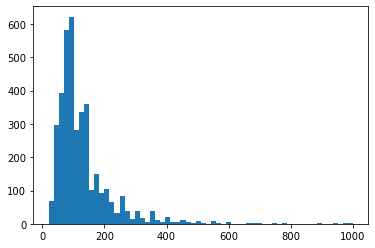

In [127]:
plt.hist(data = classifier_data, x = 'price' , bins = 60);


In [128]:
percent = classifier_data[classifier_data['price'] > 400].shape[0]/classifier_data.shape[0]
print ("{0:40}{1:.2f}".format("The Seattle proportion of the prices > 400 : ",percent))

The Seattle proportion of the prices > 400 : 0.02


In [129]:
## Statistical data about the price for Boston
classifier_data_b['price'].describe()

count    3582.000000
mean      173.930765
std       148.389339
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

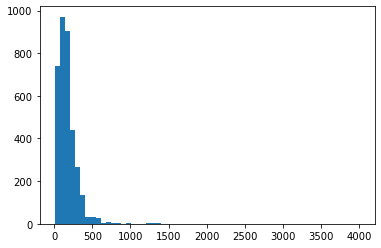

In [130]:
plt.hist(data = classifier_data_b, x = 'price' , bins = 60);

The prices are defintely higher in Boston in all quartiles

In [131]:
percent_b = classifier_data_b[classifier_data_b['price'] > 500].shape[0]/classifier_data_b.shape[0]

print ("{0:40}{1:.2f}".format("The Boston proportion of the prices > 400 :",percent_b))

The Boston proportion of the prices > 400 :0.02


In [132]:
## I will take away these outliers

In [133]:
classifier_data = classifier_data[classifier_data['price'] <= 400]

In [134]:
## The new length of the dataframe
classifier_data.shape[0]

3755

In [135]:
classifier_data_b = classifier_data_b[classifier_data_b['price'] <= 500]

In [136]:
## The new length of the dataframe
classifier_data_b.shape[0]

3516

## 4. Analyze The Data

### 4.1 Geographical distribution of the average Airbnb rental price

> In the first part of the analysis , I will compair the geographic distribution of the rents in both cities. In order to do so, I have already, both for Seattle and Boston , created a dataframe  with the average actual price per house ('listing_id). I will now merge these dataframes with the  df_listingsseattle and df_listingsboston dataframes. 

First we need to create a dataframe with the average rental price per listing_id

In [137]:
## Calculate the actual average price per listing_id for Seattle
avp_seattle = df_calendarseattle.groupby('id').mean().reset_index()


In [138]:
avp_seattle.head()

id  price_calendar  price_listing   price_adj
0  3335      120.000000          120.0  120.000000
1  4291       82.000000           82.0   82.000000
2  5682       53.944984           48.0   53.032877
3  6606       92.849315           90.0   92.849315
4  7369       85.000000           85.0   85.000000

In [139]:
avp_seattle.shape

(3818, 4)

In [140]:
## Calculate the actual average price per listing_id for Boston
avp_boston = df_calendarboston.groupby('id').mean().reset_index()

In [141]:
avp_boston.head()

id  price_calendar  price_listing   price_adj
0  3353       35.204819           40.0   36.728767
1  5506      147.267442          145.0  147.136986
2  6695      197.407407          195.0  197.136986
3  6976       65.000000           65.0   65.000000
4  8792      154.000000          154.0  154.000000

In [142]:
avp_boston.shape

(3585, 4)

In [143]:
## merge the dataframe with the actual average price per house  and the attributes per house
## Seattle
mergedseattle = avp_seattle.merge(classifier_data, left_on='id', right_on = 'id', how = 'inner')
## Boston
mergedboston  = avp_boston.merge(classifier_data_b, left_on='id', right_on = 'id', how = 'inner')

In [144]:
mergedseattle.head()

id  price_calendar  price_listing   price_adj  review_scores_cleanliness  \
0  3335      120.000000          120.0  120.000000                          9   
1  4291       82.000000           82.0   82.000000                          9   
2  5682       53.944984           48.0   53.032877                         10   
3  6606       92.849315           90.0   92.849315                          9   
4  7369       85.000000           85.0   85.000000                         10   

  cancellation_policy  number_of_reviews zipcode neighbourhood_cleansed  \
0              strict                  0   98118                 Dunlap   
1            moderate                 35   98115              Roosevelt   
2              strict                297   98106         South Delridge   
3              strict                 52   98103            Wallingford   
4            flexible                 40   98122               Broadway   

   accommodates  bedrooms  bathrooms        room_type property_type  price  
0             4         2          1  Entire home/apt         House  120.0  
1             2         1          1     Private room         House   82.0  
2             2         1          1  Entire home/apt     Apartment   48.0  
3             2         1          1  Entire home/apt     Apartment   90.0  
4             2         1          1  Entire home/apt   Condominium   85.0

In [145]:
mergedboston.head()

id  price_calendar  price_listing   price_adj  review_scores_cleanliness  \
0  3353       35.204819           40.0   36.728767                          8   
1  5506      147.267442          145.0  147.136986                         10   
2  6695      197.407407          195.0  197.136986                         10   
3  6976       65.000000           65.0   65.000000                          9   
4  8792      154.000000          154.0  154.000000                          9   

  cancellation_policy  number_of_reviews zipcode neighbourhood_cleansed  \
0              strict                 34   02134                Allston   
1              strict                 36   02119                Roxbury   
2              strict                 47   02119                Roxbury   
3            moderate                 41   02131             Roslindale   
4            moderate                 18   02108               Downtown   

   accommodates  bedrooms  bathrooms        room_type property_type  price  
0             1         1          1     Private room     Apartment   40.0  
1             2         1          1     Private room         House  145.0  
2             4         1          1  Entire home/apt     Apartment  195.0  
3             2         1          1     Private room     Apartment   65.0  
4             3         1          1  Entire home/apt     Apartment  154.0

The column price_x is the actual average price paid, price_y is the the catalog price.
I will rename these two columns

In [146]:
## rename the price_x and price_y columns (names generated by the merger process)
#mergedseattle =mergedseattle.rename(columns={'price_x':'price_actual','price_y':'price_catalog'})
#mergedboston =mergedboston.rename(columns={'price_x':'price_actual','price_y':'price_catalog'})

In [147]:
## I need only a limited number of columns to be merged with the geospatial data
mergedseattle =mergedseattle[['zipcode','price_adj']]
mergedboston =mergedboston[['neighbourhood_cleansed','price_adj']]


In [148]:
## make the average price per zipcode 
avp_zip_seattle = mergedseattle.groupby('zipcode').mean()[['price_adj']].reset_index()
## make the average price per neighbourhood for Boston
avp_neigh_boston = mergedboston.groupby('neighbourhood_cleansed').mean()[['price_adj']].reset_index()


In [149]:
avp_zip_seattle.head(30)

zipcode   price_adj
0    91107  237.997260
1    98101  182.950907
2    98102  122.623728
3    98103  127.236990
4    98104  141.570901
5    98105  110.333006
6    98106   86.956495
7    98107  128.125021
8    98108   86.089677
9    98109  143.675294
10   98112  127.781245
11   98115  107.836659
12   98116  148.474540
13   98117  108.815846
14   98118   97.225814
15   98119  143.172950
16   98121  167.567353
17   98122  130.861934
18   98125   91.417442
19   98126  121.819443
20   98133   88.903216
21   98134  213.347397
22   98136  133.365976
23   98144  108.403190
24   98146  100.375342
25   98177  101.376208
26   98178   99.531898
27   98199  162.611387

In [150]:
avp_zip_seattle.shape


(28, 2)

In [151]:
avp_zip_seattle.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
zipcode      28 non-null object
price_adj    28 non-null float64
dtypes: float64(1), object(1)
memory usage: 576.0+ bytes


In [152]:

avp_neigh_boston.head(30)


neighbourhood_cleansed   price_adj
0                   Allston  112.615351
1                  Back Bay  244.591959
2               Bay Village  274.061986
3               Beacon Hill  202.046013
4                  Brighton  114.955390
5               Charlestown  180.934042
6                 Chinatown  270.928806
7                Dorchester   93.605734
8                  Downtown  257.252703
9               East Boston  123.710795
10                   Fenway  206.686175
11                Hyde Park   86.276889
12            Jamaica Plain  134.598691
13         Leather District  264.597260
14    Longwood Medical Area  136.474581
15                 Mattapan   76.572260
16             Mission Hill  122.732376
17                North End  203.314291
18               Roslindale   99.342955
19                  Roxbury  136.941096
20             South Boston  188.760170
21  South Boston Waterfront  271.975703
22                South End  195.767297
23                 West End  263.221638
24             West Roxbury  110.517272

In [153]:
crs = {'init':'epsg:4326'}

In [154]:
df_seattle_zip.head()


OBJECTID    ZIP ZIPCODE COUNTY     SHAPE_Leng    SHAPE_Area  \
0         1  98031   98031    033  117508.211718  2.280129e+08   
1         2  98032   98032    033  166737.664791  4.826754e+08   
2         3  98033   98033    033  101363.840369  2.566747e+08   
3         4  98034   98034    033   98550.452509  2.725072e+08   
4         5  98030   98030    033   94351.264837  2.000954e+08   

                                            geometry  
0  POLYGON ((-122.21842 47.43750, -122.21935 47.4...  
1  MULTIPOLYGON (((-122.24187 47.44122, -122.2411...  
2  POLYGON ((-122.20571 47.65170, -122.20511 47.6...  
3  POLYGON ((-122.17551 47.73706, -122.17554 47.7...  
4  POLYGON ((-122.16746 47.38549, -122.16746 47.3...

In [155]:
df_seattle_zip['ZIPCODE'].value_counts()


98077    2
98072    2
98354    2
98092    2
98047    2
        ..
98012    1
98439    1
98941    1
98447    1
98223    1
Name: ZIPCODE, Length: 197, dtype: int64

Strange that some zipcodes appear twice !

In [156]:
## The areas with a zipcode for which there are no Airbnb rentals
## are deleted from the dataset

df_seattle_zip = df_seattle_zip[(df_seattle_zip['ZIP'] > 98100) & (df_seattle_zip['ZIP']<= 98199)]

In [157]:
df_seattle_zip['ZIPCODE'].value_counts()

98110    1
98154    1
98116    1
98199    1
98103    1
98133    1
98188    1
98121    1
98122    1
98195    1
98112    1
98108    1
98198    1
98109    1
98102    1
98117    1
98136    1
98119    1
98115    1
98105    1
98101    1
98134    1
98168    1
98148    1
98166    1
98158    1
98164    1
98144    1
98177    1
98104    1
98118    1
98146    1
98178    1
98106    1
98126    1
98155    1
98107    1
98125    1
Name: ZIPCODE, dtype: int64

THE issue of the double zipcodes is solved by deleting the zipcodes that are not in the Airbnb dataset

In [158]:
## The datasets with the average price per zipcode and
## the geographical dataset are merged
seattle_zipcode_merged = df_seattle_zip.merge(avp_zip_seattle, left_on= 'ZIPCODE', right_on = 'zipcode', how = 'inner')

In [159]:
## a look at the merged dataset
seattle_zipcode_merged.head(30)


OBJECTID    ZIP ZIPCODE COUNTY    SHAPE_Leng    SHAPE_Area  \
0         35  98101   98101    033  23619.028932  1.470012e+07   
1         36  98102   98102    033  37488.788166  4.322189e+07   
2         45  98112   98112    033  66321.069338  8.818645e+07   
3         46  98115   98115    033  77105.177543  1.813559e+08   
4         47  98116   98116    033  46123.021535  8.145976e+07   
5         57  98136   98136    033  52802.888149  6.319544e+07   
6         68  98103   98103    033  71421.204751  1.440083e+08   
7         69  98104   98104    033  35668.302517  2.108730e+07   
8         70  98105   98105    033  77620.084289  9.703543e+07   
9         71  98106   98106    033  79836.811346  1.482014e+08   
10        72  98107   98107    033  52798.578815  6.545106e+07   
11        73  98108   98108    033  84808.350420  2.150580e+08   
12        74  98109   98109    033  40749.039109  6.635577e+07   
13        75  98118   98118    033  92007.713745  1.707186e+08   
14        76  98119   98119    033  58777.608891  7.607224e+07   
15        77  98121   98121    033  25270.257818  1.225219e+07   
16        78  98122   98122    033  49484.404281  6.454818e+07   
17        79  98125   98125    033  67173.292448  1.498538e+08   
18        80  98126   98126    033  82378.301761  9.654464e+07   
19        81  98133   98133    033  95065.036676  1.954221e+08   
20        82  98134   98134    033  64395.106849  1.123536e+08   
21        83  98144   98144    033  52028.999920  9.241941e+07   
22        84  98146   98146    033  64035.449180  1.263424e+08   
23        90  98117   98117    033  55360.260423  1.073120e+08   
24        91  98177   98177    033  95211.465988  1.596729e+08   
25        92  98178   98178    033  66906.676245  1.353505e+08   
26       100  98199   98199    033  56826.422800  1.145346e+08   

                                             geometry zipcode   price_adj  
0   POLYGON ((-122.32785 47.61850, -122.32787 47.6...   98101  182.950907  
1   POLYGON ((-122.31232 47.64705, -122.31233 47.6...   98102  122.623728  
2   MULTIPOLYGON (((-122.30683 47.64729, -122.3068...   98112  127.781245  
3   POLYGON ((-122.27294 47.70107, -122.27289 47.7...   98115  107.836659  
4   POLYGON ((-122.38139 47.59054, -122.38144 47.5...   98116  148.474540  
5   POLYGON ((-122.38085 47.55750, -122.38087 47.5...   98136  133.365976  
6   POLYGON ((-122.32925 47.70319, -122.32920 47.7...   98103  127.236990  
7   POLYGON ((-122.31753 47.60141, -122.31696 47.6...   98104  141.570901  
8   MULTIPOLYGON (((-122.30978 47.67381, -122.3065...   98105  110.333006  
9   POLYGON ((-122.33709 47.54475, -122.33448 47.5...   98106   86.956495  
10  MULTIPOLYGON (((-122.40585 47.67582, -122.4057...   98107  128.125021  
11  POLYGON ((-122.29156 47.56932, -122.29156 47.5...   98108   86.089677  
12  POLYGON ((-122.33574 47.64203, -122.33573 47.6...   98109  143.675294  
13  MULTIPOLYGON (((-122.27555 47.57033, -122.2754...   98118   97.225814  
14  POLYGON ((-122.35767 47.65128, -122.35768 47.6...   98119  143.172950  
15  POLYGON ((-122.35736 47.61861, -122.35676 47.6...   98121  167.567353  
16  POLYGON ((-122.32272 47.61931, -122.32272 47.6...   98122  130.861934  
17  POLYGON ((-122.28422 47.73374, -122.28422 47.7...   98125   91.417442  
18  POLYGON ((-122.38139 47.59054, -122.38139 47.5...   98126  121.819443  
19  POLYGON ((-122.35595 47.77776, -122.35594 47.7...   98133   88.903216  
20  POLYGON ((-122.31777 47.59643, -122.31737 47.5...   98134  213.347397  
21  POLYGON ((-122.31413 47.60085, -122.31350 47.6...   98144  108.403190  
22  POLYGON ((-122.33425 47.51390, -122.33419 47.5...   98146  100.375342  
23  POLYGON ((-122.35808 47.70147, -122.35807 47.7...   98117  108.815846  
24  POLYGON ((-122.35904 47.77776, -122.35904 47.7...   98177  101.376208  
25  POLYGON ((-122.21902 47.50057, -122.21902 47.5...   98178   99.531898  
26  MULTIPOLYGON (((-122.40912 47.67160, -122.4089...   98199  162.611387

In [160]:
seattle_zipcode_merged['price_adj'].describe()

count     27.000000
mean     125.275921
std       31.045288
min       86.089677
25%      100.875775
50%      122.623728
75%      142.371926
max      213.347397
Name: price_adj, dtype: float64

In [161]:
## The datasets with the average price per zipcode and
## the geographical dataset are merged
boston_zipcode_merged = df_boston_zip.merge(avp_neigh_boston, left_on= 'Name', right_on = 'neighbourhood_cleansed', how = 'inner')


In [162]:
boston_zipcode_merged.head(30)

OBJECTID                     Name        Acres Neighborho  SqMiles  \
0          1               Roslindale  1605.568237         15     2.51   
1          2            Jamaica Plain  2519.245394         11     3.94   
2          3             Mission Hill   350.853564         13     0.55   
3          5              Bay Village    26.539839         33     0.04   
4          6         Leather District    15.639908         27     0.02   
5          7                Chinatown    76.324410         26     0.12   
6          8                North End   126.910439         14     0.20   
7          9                  Roxbury  2108.469072         16     3.29   
8         10                South End   471.535356         32     0.74   
9         11                 Back Bay   399.314411          2     0.62   
10        12              East Boston  3012.059593          8     4.71   
11        13              Charlestown   871.541223          4     1.36   
12        14                 West End   190.490732         31     0.30   
13        15              Beacon Hill   200.156904         30     0.31   
14        16                 Downtown   397.472846          7     0.62   
15        17                   Fenway   560.618461         34     0.88   
16        18                 Brighton  1840.408596         25     2.88   
17        19             West Roxbury  3516.421786         19     5.49   
18        20                Hyde Park  2927.221168         10     4.57   
19        21                 Mattapan  1352.098354         12     2.11   
20        22               Dorchester  4662.879457          6     7.29   
21        23  South Boston Waterfront   621.843524         29     0.97   
22        24             South Boston  1439.888807         17     2.25   
23        25                  Allston   998.534479         24     1.56   

      ShapeSTAre     ShapeSTLen  \
0   6.993827e+07   53563.912597   
1   1.097379e+08   56349.937161   
2   1.528312e+07   17918.724113   
3   1.156071e+06    4650.635493   
4   6.812717e+05    3237.140537   
5   3.324678e+06    9736.590413   
6   5.527506e+06   16177.826815   
7   9.184455e+07   49488.800485   
8   2.054000e+07   17912.333569   
9   1.739407e+07   19455.671146   
10  1.312048e+08  119815.819136   
11  3.796418e+07   57509.688645   
12  8.297743e+06   17728.590027   
13  8.718800e+06   14303.829017   
14  1.731385e+07   34612.804441   
15  2.442044e+07   24620.876452   
16  8.016788e+07   48787.519652   
17  1.531747e+08   66067.419838   
18  1.275092e+08   66861.244955   
19  5.889717e+07   42005.773707   
20  2.031142e+08  104344.034005   
21  2.708740e+07   38391.352905   
22  6.272131e+07   64998.420283   
23  4.349599e+07   37859.091242   

                                             geometry  \
0   MULTIPOLYGON (((-71.12593 42.27201, -71.12575 ...   
1   POLYGON ((-71.10499 42.32610, -71.10488 42.326...   
2   POLYGON ((-71.09043 42.33577, -71.09275 42.333...   
3   POLYGON ((-71.06663 42.34878, -71.06739 42.348...   
4   POLYGON ((-71.05838 42.34983, -71.05877 42.349...   
5   POLYGON ((-71.05791 42.35238, -71.05796 42.352...   
6   POLYGON ((-71.05200 42.36884, -71.05169 42.368...   
7   POLYGON ((-71.09646 42.29323, -71.09662 42.293...   
8   POLYGON ((-71.06834 42.34775, -71.06834 42.347...   
9   POLYGON ((-71.07569 42.35692, -71.07579 42.356...   
10  POLYGON ((-70.99546 42.39394, -70.99524 42.393...   
11  MULTIPOLYGON (((-71.07416 42.39051, -71.07415 ...   
12  MULTIPOLYGON (((-71.06478 42.36882, -71.06467 ...   
13  POLYGON ((-71.07141 42.36119, -71.07080 42.361...   
14  POLYGON ((-71.05342 42.36130, -71.05276 42.360...   
15  POLYGON ((-71.11011 42.35208, -71.10986 42.352...   
16  POLYGON ((-71.13517 42.34601, -71.13528 42.345...   
17  POLYGON ((-71.16470 42.30384, -71.15211 42.294...   
18  POLYGON ((-71.12588 42.27211, -71.12577 42.272...   
19  POLYGON ((-71.09633 42.29316, -71.09620 42.292...   
20  MULTIPOLYGON (((-71.05896 42.32876, -71.05812 ...   
21  POLYGON ((-71.04348

In [163]:
boston_zipcode_merged['price_adj'].describe()

count     24.000000
mean     176.500285
std       68.836754
min       76.572260
25%      114.370380
50%      184.847106
75%      247.757145
max      274.061986
Name: price_adj, dtype: float64

#### In the next cells I will print the map for Seattle

In [164]:
##Defining the centroids (starting point of the map)
x_map=seattle_zipcode_merged.centroid.x.mean()
y_map=seattle_zipcode_merged.centroid.y.mean()
print(x_map,y_map)

-122.33713648474314 47.616691780174236


In [165]:
## Further preparation of the Seattle map
#mymap_seattle = folium.Map(location=[y_map, x_map], zoom_start=11,tiles=None)
#folium.TileLayer('CartoDB positron',name="Light Map",control=False).add_to(mymap_seattle)
#mymap_seattle

def folium_map(y_map, x_map, my_loc,my_geodata,my_columns,my_key_on,my_legend):
    m = folium.Map(location=[y_map, x_map], zoom_start=10)
    loc = my_loc
    title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 
    folium.Choropleth(
        geo_data=my_geodata,
        name='choropleth',
        data=my_geodata,
        columns=my_columns,
        key_on=my_key_on,
        #fill_color='YlGn',
        fill_color = 'YlGnBu',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name= my_legend
        ).add_to(m)
    m.get_root().html.add_child(folium.Element(title_html))
    folium.LayerControl().add_to(m);
    return m






In [166]:
## print the Seattle map
my_geodata = seattle_zipcode_merged.copy()
my_loc = 'Seattle AirBnb Rental Prices per Zipcode'
my_columns = ['zipcode','price_adj']
my_key_on = "feature.properties.zipcode"
my_legend = 'Price per Day AirBnb Seattle'
map =folium_map(y_map, x_map, my_loc,my_geodata,my_columns,my_key_on,my_legend)


In [167]:
map


In [168]:
#Defining the centroids for Boston
x_map=boston_zipcode_merged.centroid.x.mean()
y_map=boston_zipcode_merged.centroid.y.mean()
print(x_map, y_map)

-71.0834766739362 42.33415223738253


In [169]:
## print the Boston map
my_geodata = boston_zipcode_merged.copy()
my_loc = 'Boston AirBnb Rental Prices per Zipcode'
my_columns = ['Name','price_adj']
my_key_on= "feature.properties.Name"
my_legend = 'Price per Day AirBnb Boston'
map =folium_map(y_map, x_map,my_loc,my_geodata,my_columns,my_key_on,my_legend)
map


**Conclusion Seattle** :
> If a north - south axis would be drawn through the middle of Seattle, one could say that the Airbnb prices for any type of lodging are more expensive to the west of that line than to the east. There is not a single location (zipcode) where this is not the case. The most expensive area is the 98134 area, followed by the areas immediately in the north - west of this area. Strange is also that the most expensive area is adjacent to the cheapest area. One would expect a more gradually transition.

**Conclusion Boston** :
> The most expensive neighborhood to rent something in Boston is clearly on the south bank of the Waterfront and along the Charles River where Beacon Hill is cheaper than Back Bay and West End. W’

### 4.2 Classifier for the Price Category - Most important Features

#### 4.2.1 One-Hot encoding for the categorical variables

I will apply this encoding type becayse the features room_type and property_type are nominal features

In [170]:
## create the dummy variables for the columns room_type and proporty_type
classifier_dummies = pd.get_dummies(classifier_data[['room_type','cancellation_policy','property_type','zipcode','neighbourhood_cleansed']])
classifier_data = classifier_data.join(classifier_dummies)
## The colimns room_type and property_type are not needed anymore

classifier_data.drop(columns = ['room_type','cancellation_policy','property_type','zipcode','neighbourhood_cleansed'], axis = 1, inplace = True)

## create the dummy variables for the columns room_type and proporty_type
classifier_dummies_b = pd.get_dummies(classifier_data_b[['room_type','cancellation_policy','property_type','zipcode','neighbourhood_cleansed']])
classifier_data_b = classifier_data_b.join(classifier_dummies_b)
## The colimns room_type and property_type are not needed anymore

classifier_data_b.drop(columns = ['room_type','cancellation_policy','property_type','zipcode','neighbourhood_cleansed'], axis = 1, inplace = True)


                                  



In [171]:
classifier_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 0 to 2184
Columns: 144 entries, id to neighbourhood_cleansed_Yesler Terrace
dtypes: float64(1), int64(5), object(1), uint8(137)
memory usage: 897.1+ KB


In [172]:
classifier_data_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3516 entries, 0 to 1959
Data columns (total 93 columns):
id                                                3516 non-null object
review_scores_cleanliness                         3516 non-null int64
number_of_reviews                                 3516 non-null int64
accommodates                                      3516 non-null int64
bedrooms                                          3516 non-null int64
bathrooms                                         3516 non-null int64
price                                             3516 non-null float64
room_type_Entire home/apt                         3516 non-null uint8
room_type_Private room                            3516 non-null uint8
room_type_Shared room                             3516 non-null uint8
cancellation_policy_flexible                      3516 non-null uint8
cancellation_policy_moderate                      3516 non-null uint8
cancellation_policy_strict                        

In [173]:
## I will rename some columns                                       
rename_column = {'room_type_Entire home/apt':'Entire home/apt',
                                                  'room_type_Private room':'Private room',
                                                  'room_type_Shared room':'Shared room',
                                                  'neighbourhood_cleansed_South End':'South End',
                                                  'neighbourhood_cleansed_Allston':'Allston',
                                                  'neighbourhood_cleansed_Back Bay':'Back Bay'}
                
classifier_data = classifier_data.rename(columns= rename_column )
classifier_data_b = classifier_data_b.rename(columns= rename_column)


In [174]:
classifier_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3755 entries, 0 to 2184
Columns: 144 entries, id to neighbourhood_cleansed_Yesler Terrace
dtypes: float64(1), int64(5), object(1), uint8(137)
memory usage: 737.1+ KB


The columns for the one-hot encoding have been added

#### 4.2.2 Get rid of the outliers

Already done in part 2

#### 4.2.3 Create discrete  price classes

Creation of the bins

In [175]:
#To get an idea about the price distrubution
classifier_data['price'].describe()


count    3755.000000
mean      120.749933
std        68.744681
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max       400.000000
Name: price, dtype: float64

In [176]:
#To get an idea about the price distrubution
classifier_data_b['price'].describe()


count    3516.000000
mean      161.820535
std        94.957144
min        10.000000
25%        85.000000
50%       149.000000
75%       215.000000
max       500.000000
Name: price, dtype: float64

I will take three price levels : <= 75 :       Low 0
                              : > 75  <= 150  Medium Low 1
                              : > 150 <= 400  Medium High 3
                             

In [177]:
## Creation of the price category bins
bin_edges = [0,75,150,400]
bin_labels = [0,1,2]
classifier_data['price_cat']=pd.cut(classifier_data['price'], bin_edges, labels=bin_labels)
bin_edges = [0,75,150,500]
bin_labels = [0,1,2]
classifier_data_b['price_cat']=pd.cut(classifier_data_b['price'], bin_edges, labels=bin_labels)

In [178]:
classifier_data.drop(columns = ['price'], axis = 1, inplace = True)
classifier_data_b.drop(columns = ['price'], axis = 1, inplace = True)



In [179]:
classifier_data.head()

id  review_scores_cleanliness  number_of_reviews  accommodates  \
0   241032                         10                207             4   
1   953595                         10                 43             4   
3  7421966                          9                  0             3   
5  5956968                         10                 17             2   
6  1909058                         10                 58             2   

   bedrooms  bathrooms  Entire home/apt  Private room  Shared room  \
0         1          1                1             0            0   
1         1          1                1             0            0   
3         0          1                1             0            0   
5         1          1                0             1            0   
6         1          1                0             1            0   

   cancellation_policy_flexible  ...  neighbourhood_cleansed_View Ridge  \
0                             0  ...                                  0   
1                             0  ...                                  0   
3                             1  ...                                  0   
5                             0  ...                                  0   
6                             0  ...                                  0   

   neighbourhood_cleansed_Wallingford  neighbourhood_cleansed_Wedgwood  \
0                                   0                                0   
1                                   0                                0   
3                                   0                                0   
5                                   0                                0   
6                                   0                                0   

   neighbourhood_cleansed_West Queen Anne  \
0                                       1   
1                                       1   
3                                       1   
5                                       1   
6                                       1   

   neighbourhood_cleansed_West Woodland  neighbourhood_cleansed_Westlake  \
0                                     0                                0   
1                                     0                                0   
3                                     0                                0   
5                                     0                                0   
6                                     0                                0   

   neighbourhood_cleansed_Whittier Heights  neighbourhood_cleansed_Windermere  \
0                                        0                                  0   
1                                        0                                  0   
3                                        0                                  0   
5                                        0                                  0   
6                                        0                                  0   

   neighbourhood_cleansed_Yesler Terrace  price_cat  
0                                      0          1  
1                                      0          1  
3                                      0          1  
5                                      0          1  
6                                      0          1  

[5 rows x 144 columns]

In [180]:
## The number of values per price category for Seattle
classifier_data['price_cat'].value_counts()

1    1899
0    1040
2     816
Name: price_cat, dtype: int64

In [181]:
classifier_data_b.head()

id  review_scores_cleanliness  number_of_reviews  accommodates  \
0  12147973                          9                  0             4   
1   3075044                          9                 36             2   
2      6976                          9                 41             2   
4   7651065                         10                 29             2   
5  12386020                         10                  8             2   

   bedrooms  bathrooms  Entire home/apt  Private room  Shared room  \
0         2          1                1             0            0   
1         1          1                0             1            0   
2         1          1                0             1            0   
4         1          1                0             1            0   
5         1          1                0             1            0   

   cancellation_policy_flexible  ...  neighbourhood_cleansed_Mission Hill  \
0                             0  ...                                    0   
1                             0  ...                                    0   
2                             0  ...                                    0   
4                             1  ...                                    0   
5                             1  ...                                    0   

   neighbourhood_cleansed_North End  neighbourhood_cleansed_Roslindale  \
0                                 0                                  1   
1                                 0                                  1   
2                                 0                                  1   
4                                 0                                  1   
5                                 0                                  1   

   neighbourhood_cleansed_Roxbury  neighbourhood_cleansed_South Boston  \
0                               0                                    0   
1                               0                                    0   
2                               0                                    0   
4                               0                                    0   
5                               0                                    0   

   neighbourhood_cleansed_South Boston Waterfront  South End  \
0                                               0          0   
1                                               0          0   
2                                               0          0   
4                                               0          0   
5                                               0          0   

   neighbourhood_cleansed_West End  neighbourhood_cleansed_West Roxbury  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
4                                0                                    0   
5                                0                                    0   

   price_cat  
0          2  
1          0  
2          0  
4          1  
5          0  

[5 rows x 93 columns]

In [182]:
## The number of values per price category for Boston
classifier_data_b['price_cat'].value_counts()

2    1597
1    1186
0     733
Name: price_cat, dtype: int64

In [183]:
## Change the data type of the price category to integer
classifier_data['price_cat']= classifier_data['price_cat'].astype(int)
classifier_data_b['price_cat']= classifier_data_b['price_cat'].astype(int)


#### 4.2.4 Create Train and Test Data 

In [184]:
## creation of the datadrame with the features only (the feature id is not needed)
df_train = classifier_data.drop(columns=['id','price_cat'])
df_train_b = classifier_data_b.drop(columns=['id','price_cat'])


## creation of the datafram with the labels only
df_test =  classifier_data['price_cat']
df_test_b =  classifier_data_b['price_cat']


In [185]:
## Split the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split( df_train, df_test, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split( df_train_b, df_test_b, test_size=0.2, random_state=42)



#### 4.2.5 Scale the Data 

In [186]:
## scale the data (standardize)
##scaler = StandardScaler()
## scaler for Seattle data
scaler = MinMaxScaler()
scaler.fit(X_train)
## scaler for Boston data
scaler_b = MinMaxScaler()
scaler_b.fit(X_train_b)





MinMaxScaler(copy=True, feature_range=(0, 1))

In [187]:
## I would like to keep the original X_train, X_train_b , X_test and X_test_b as
## a dataframe and not as an array
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_b_scaled = scaler_b.transform(X_train_b)
X_test_b_scaled = scaler_b.transform(X_test_b)



#### 4.2.6 Train and test the model

I will chose the 'AdaBoostClassifier' as classifier

In [188]:
model_seattle = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=3),learning_rate=0.1,random_state=42,n_estimators=50)
model_seattle.fit(X_train_scaled, y_train)



AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [189]:
model_boston = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=3),learning_rate=0.1,random_state=42,n_estimators=50)
model_boston.fit(X_train_b_scaled, y_train_b)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [190]:
## Predictions for Seattle
predictions_test = model_seattle.predict(X_test_scaled)
## Predictions for Boston
predictions_test_b = model_boston.predict(X_test_b_scaled)

In [191]:
print ("{0:20}{1:.2f}".format ("The accuracy score for Seattle : ",accuracy_score(y_test, predictions_test)))


The accuracy score for Seattle : 0.74


In [192]:
print ("{0:20}{1:.2f}".format ("The accuracy score for Boston : ",accuracy_score(y_test_b, predictions_test_b)))

The accuracy score for Boston : 0.70


In [193]:
print ("{0:20}{1:.2f}".format ("The f-beta score for Seattle : ",
                               fbeta_score(y_test,predictions_test,beta=0.5, average = 'macro')
))

The f-beta score for Seattle : 0.73


In [194]:
print ("{0:20}{1:.2f}".format ("The f-beta score for Boston : ",
                               fbeta_score(y_test_b,predictions_test_b,beta=0.5, average = 'macro')
))

The f-beta score for Boston : 0.69


In [195]:
def plot_feature_importances(model,n_features,title):
    """
    Input for this function , a trained classifier model, the number of features of the classifier
    and the title of the chart
    Output : a horizontal bar chart that shows the relative importance of each feature of the model
    """
    fig, ax  = plt.subplots(figsize=[30,80])
    
    #n_features = df_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_ , align='center')
    plt.yticks(np.arange (0,n_features,1), df_train.columns, fontsize= 16)
    plt.xlabel("Importance of the features", fontsize = 25)
    plt.title(title, fontsize= 50)

In [196]:
def feature_plot(importances, X_train, y_train,title):
    """"
    Input for this function , a trained classifier model
    and the title of the chart
    Output : a vertical bar chart that shows the relative importance of each feature of the model
    
    """
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title(title, fontsize = 16)
    #plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
    #     label = "Feature Weight")
    plt.bar(np.arange(5), values, width = 0.6, align="center", color=['blue'],\
         label = "Feature Weight")
    
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color=['cyan'], \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  

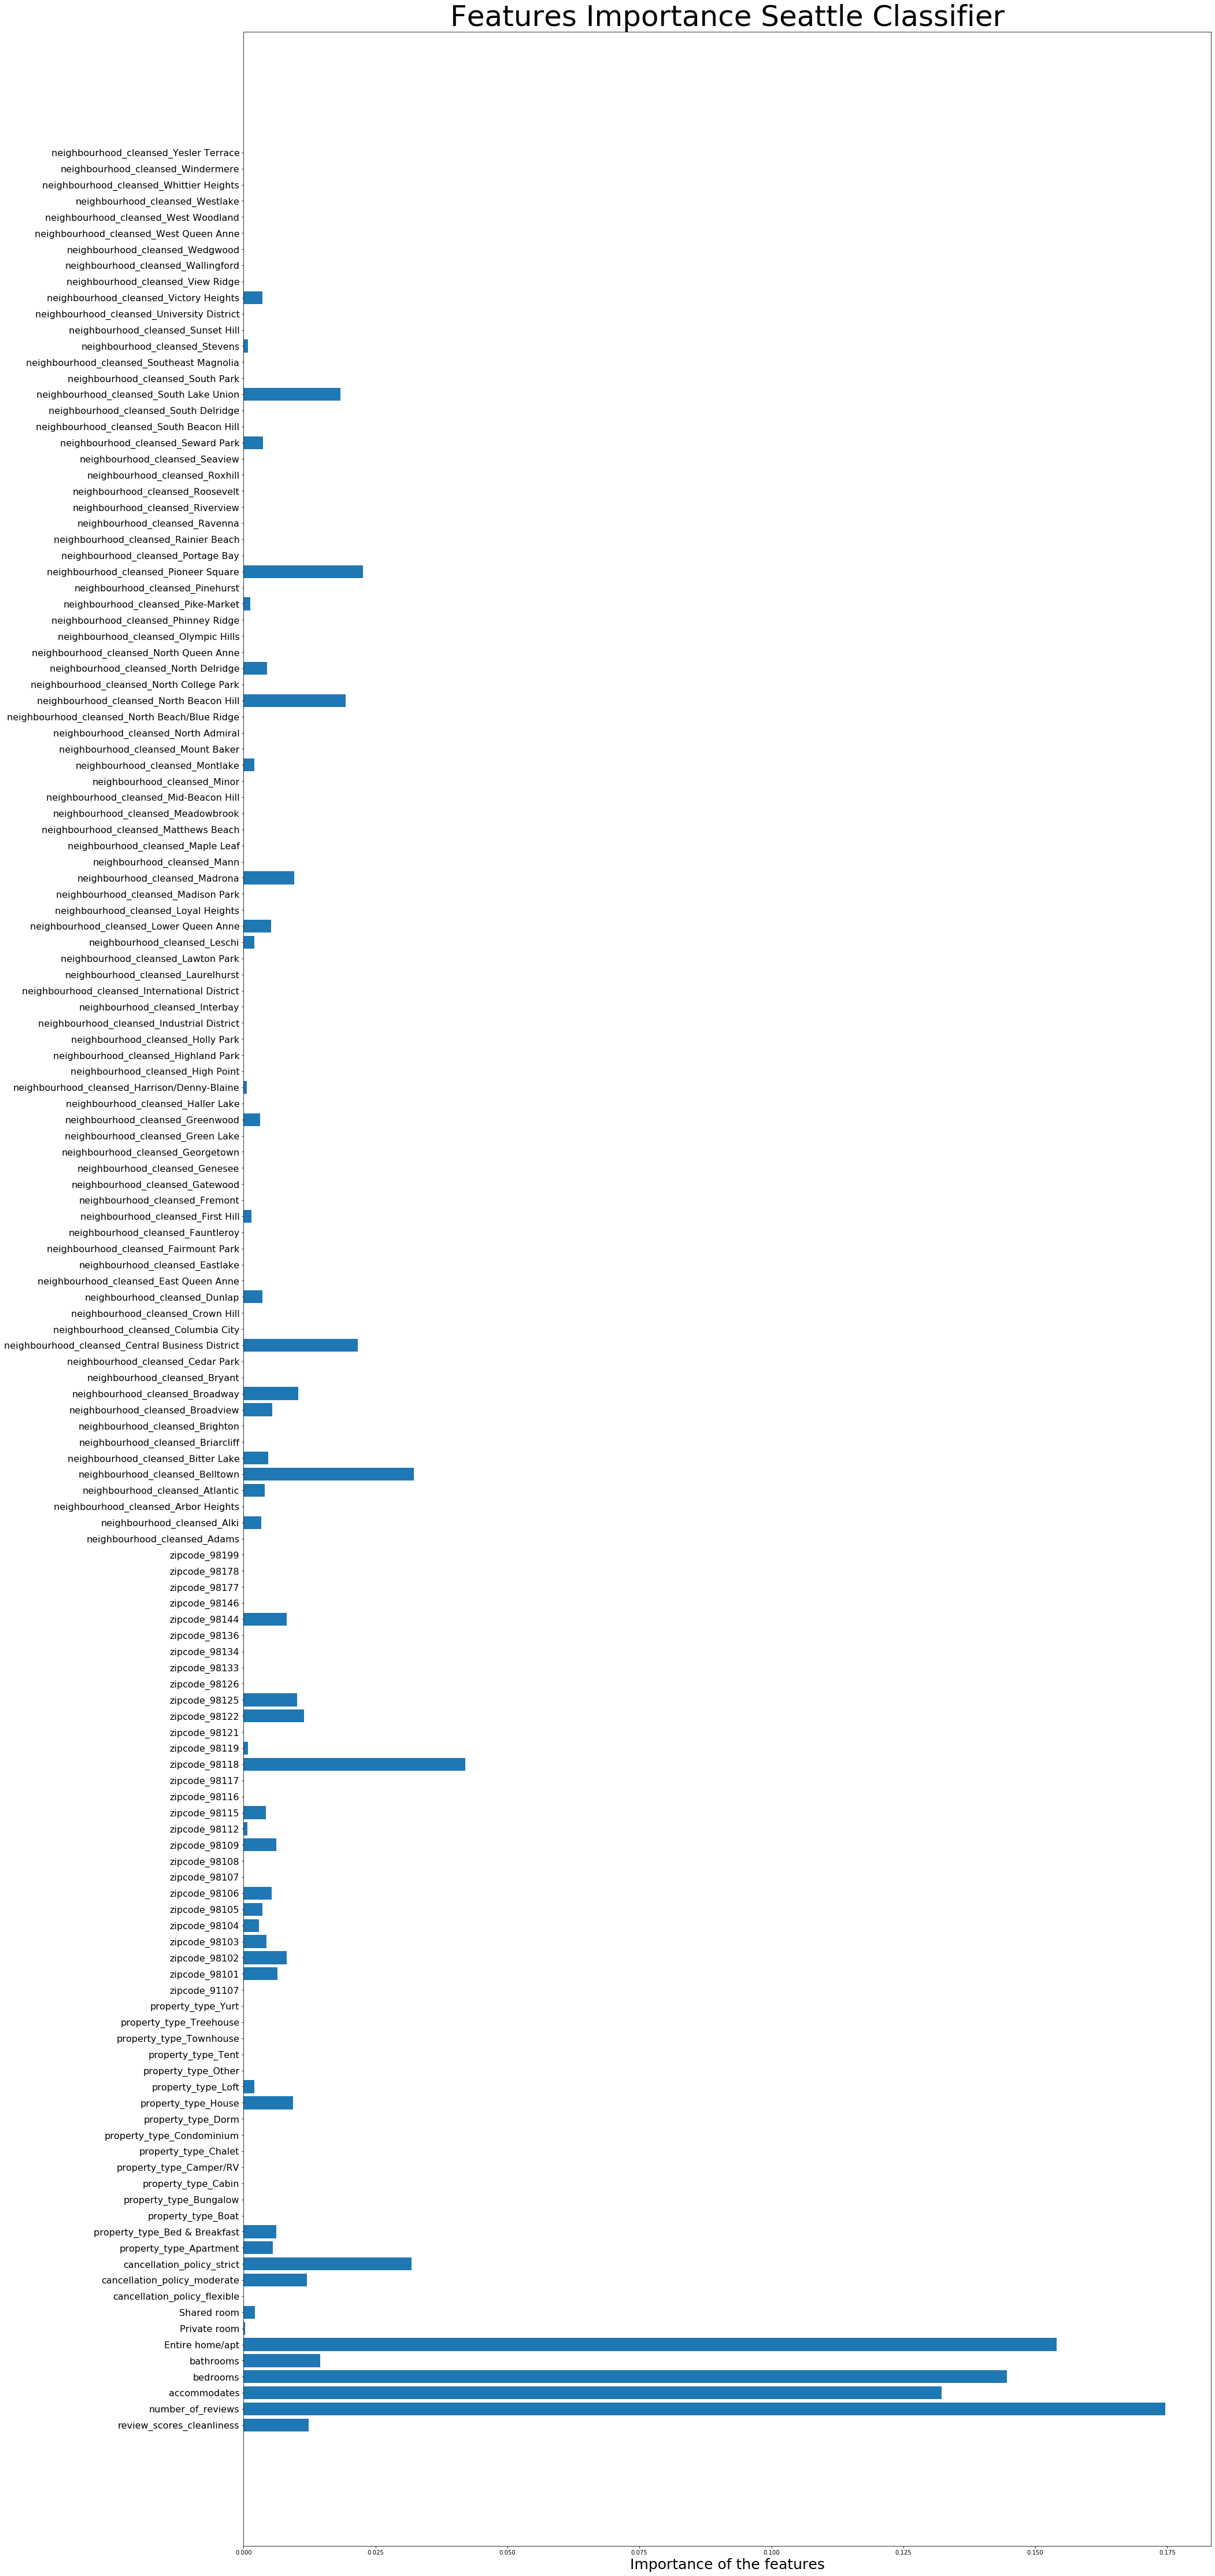

In [197]:
## The function plot_feature_importance is called for Seattle
title = "Features Importance Seattle Classifier"
plot_feature_importances(model_seattle, df_train.shape[1],title)


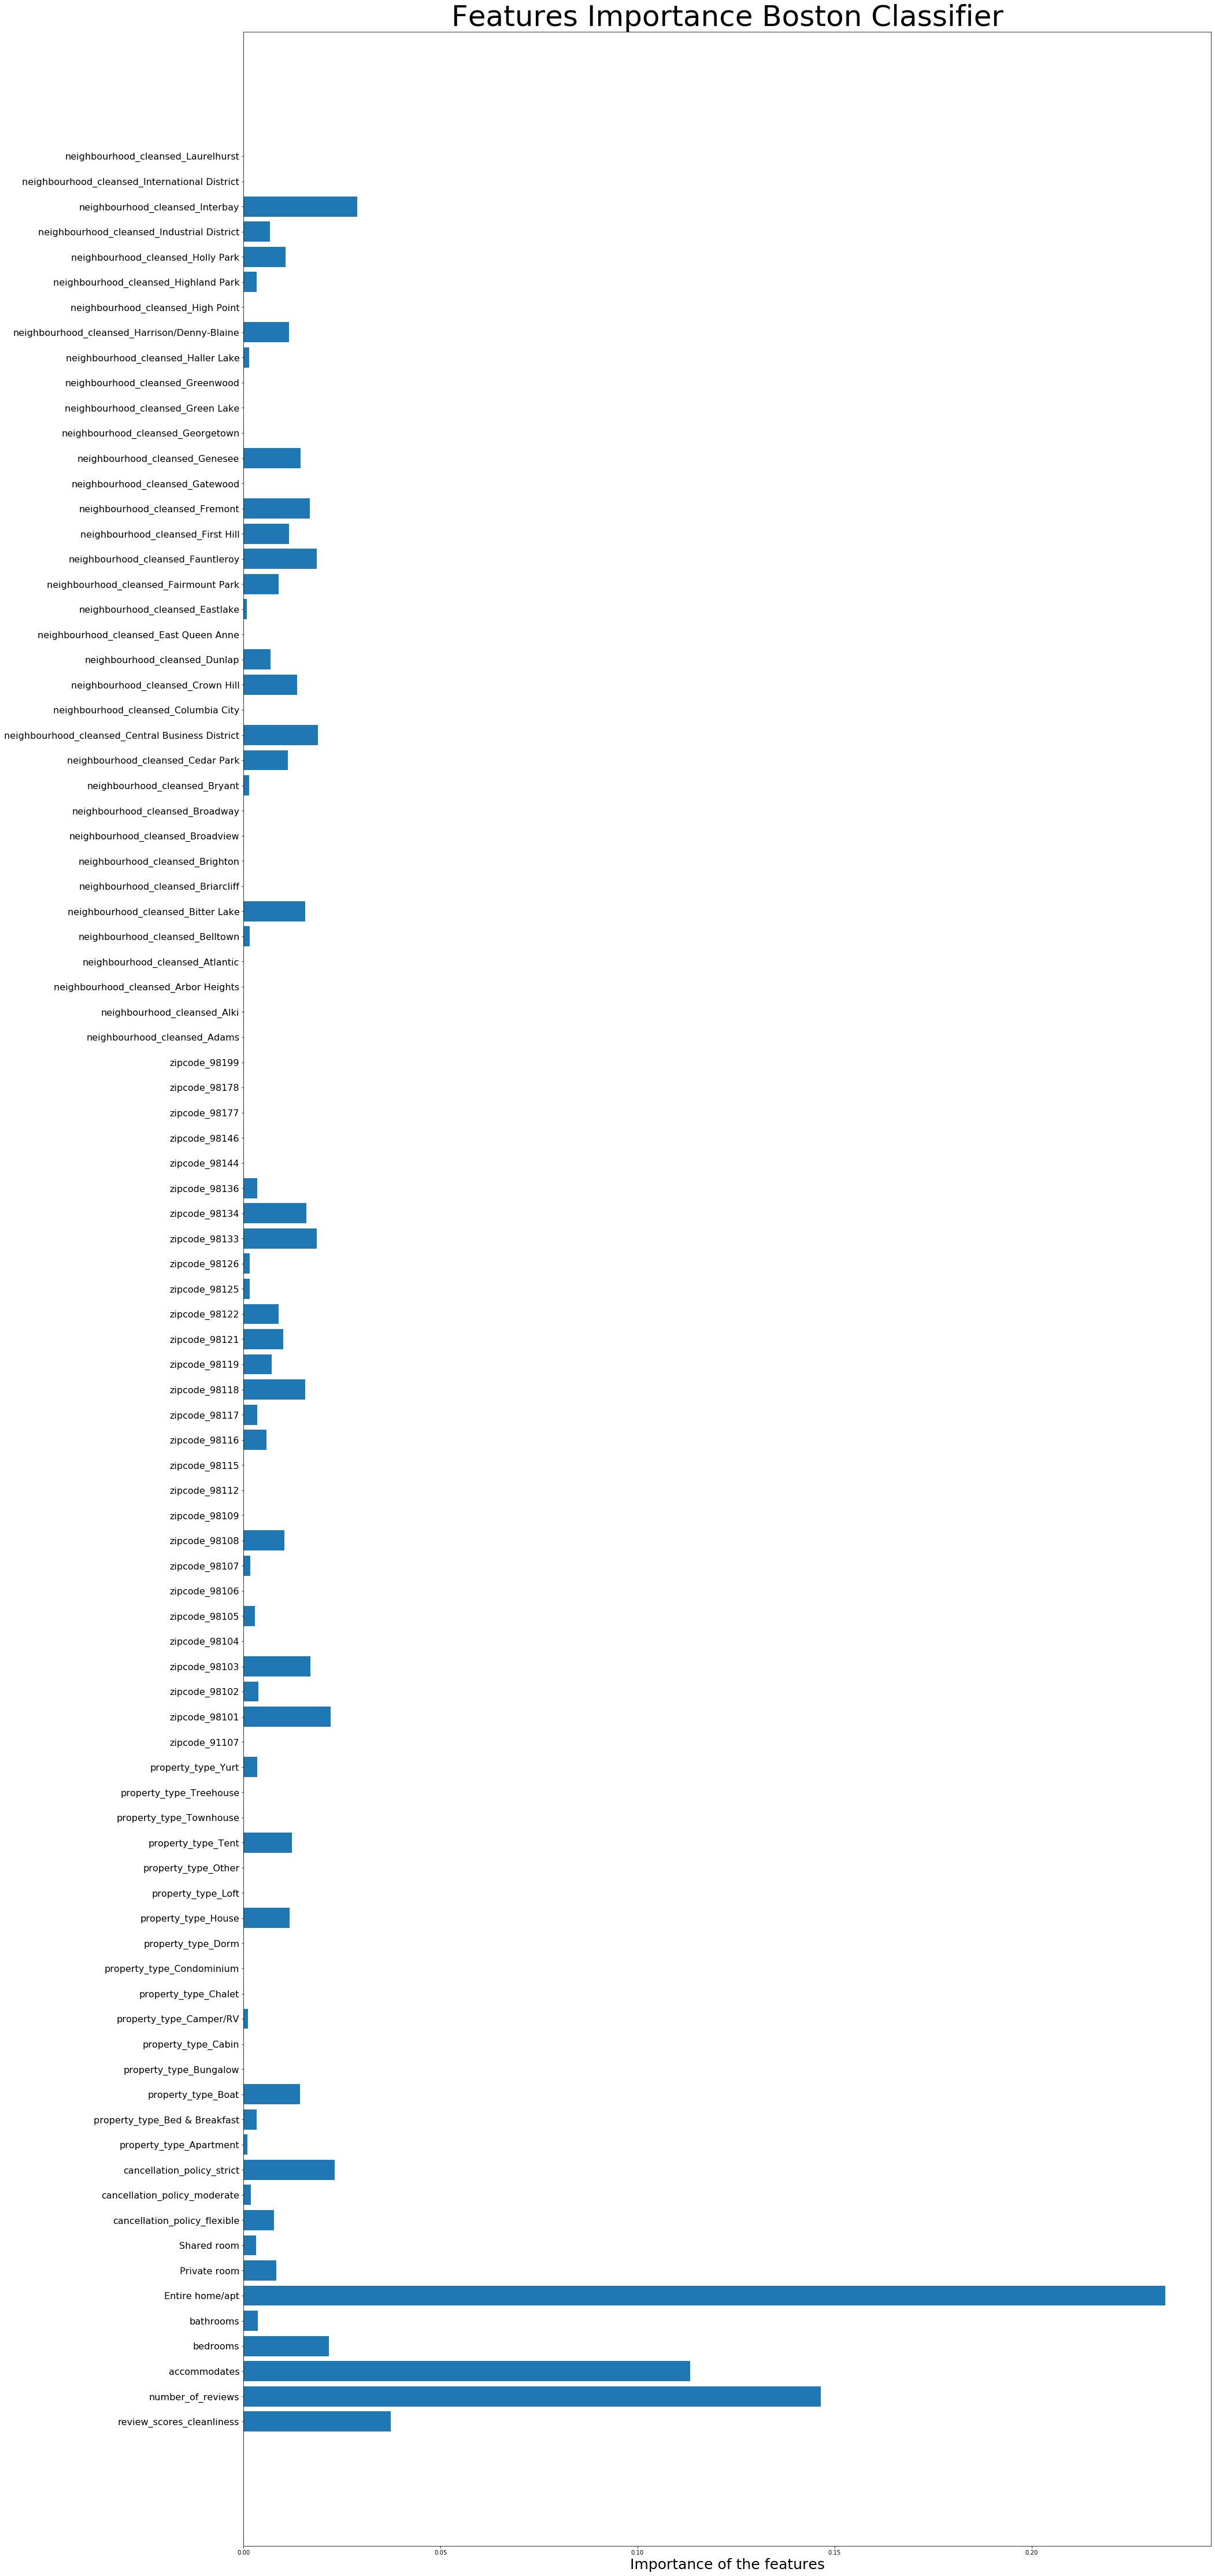

In [198]:
## The function plot_feature_importance is called for Boston
title = "Features Importance Boston Classifier"
plot_feature_importances(model_boston,df_train_b.shape[1], title )

A representation with numbers

In [199]:
##Seattle
importances = model_seattle.feature_importances_


In [200]:
## I will attach they key:value pairs to a dictionnary
importances_dict = {}
for i in range (len(importances)):
    importances_dict[X_train.columns[i]] = importances[i]


In [201]:
## Feature : Feature importance pairs in ascending order
{k: v for k, v in sorted(importances_dict.items(), key=lambda item: item[1])}

{'cancellation_policy_flexible': 0.0,
 'property_type_Boat': 0.0,
 'property_type_Bungalow': 0.0,
 'property_type_Cabin': 0.0,
 'property_type_Camper/RV': 0.0,
 'property_type_Chalet': 0.0,
 'property_type_Condominium': 0.0,
 'property_type_Dorm': 0.0,
 'property_type_Other': 0.0,
 'property_type_Tent': 0.0,
 'property_type_Townhouse': 0.0,
 'property_type_Treehouse': 0.0,
 'property_type_Yurt': 0.0,
 'zipcode_91107': 0.0,
 'zipcode_98107': 0.0,
 'zipcode_98108': 0.0,
 'zipcode_98116': 0.0,
 'zipcode_98117': 0.0,
 'zipcode_98121': 0.0,
 'zipcode_98126': 0.0,
 'zipcode_98133': 0.0,
 'zipcode_98134': 0.0,
 'zipcode_98136': 0.0,
 'zipcode_98146': 0.0,
 'zipcode_98177': 0.0,
 'zipcode_98178': 0.0,
 'zipcode_98199': 0.0,
 'neighbourhood_cleansed_Adams': 0.0,
 'neighbourhood_cleansed_Arbor Heights': 0.0,
 'neighbourhood_cleansed_Briarcliff': 0.0,
 'neighbourhood_cleansed_Brighton': 0.0,
 'neighbourhood_cleansed_Bryant': 0.0,
 'neighbourhood_cleansed_Cedar Park': 0.0,
 'neighbourhood_cleansed

In the next cells, I will give visual presentation of the 5 most important features

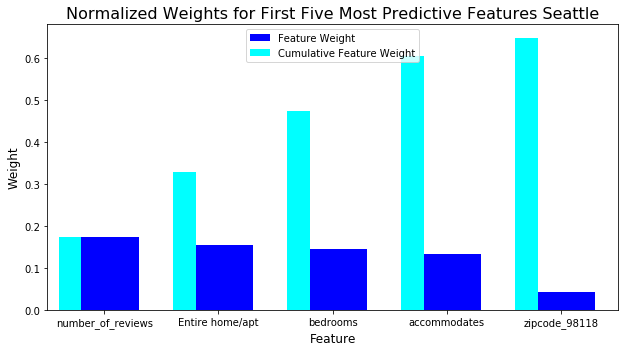

In [202]:
## print the map for Seattle
title = "Normalized Weights for First Five Most Predictive Features Seattle"
feature_plot(importances, X_train, y_train,title)
    

In [203]:
## Boston
importances = model_boston.feature_importances_


In [204]:
## I will attach they key:value pairs to a dictionnary
importances_dict = {}
for i in range (len(importances)):
    importances_dict[X_train.columns[i]] = importances[i]

In [205]:
## Feature : Feature importance pairs in ascending order
{k: v for k, v in sorted(importances_dict.items(), key=lambda item: item[1])}

{'property_type_Bungalow': 0.0,
 'property_type_Cabin': 0.0,
 'property_type_Chalet': 0.0,
 'property_type_Condominium': 0.0,
 'property_type_Dorm': 0.0,
 'property_type_Loft': 0.0,
 'property_type_Other': 0.0,
 'property_type_Townhouse': 0.0,
 'property_type_Treehouse': 0.0,
 'zipcode_91107': 0.0,
 'zipcode_98104': 0.0,
 'zipcode_98106': 0.0,
 'zipcode_98109': 0.0,
 'zipcode_98112': 0.0,
 'zipcode_98115': 0.0,
 'zipcode_98144': 0.0,
 'zipcode_98146': 0.0,
 'zipcode_98177': 0.0,
 'zipcode_98178': 0.0,
 'zipcode_98199': 0.0,
 'neighbourhood_cleansed_Adams': 0.0,
 'neighbourhood_cleansed_Alki': 0.0,
 'neighbourhood_cleansed_Arbor Heights': 0.0,
 'neighbourhood_cleansed_Atlantic': 0.0,
 'neighbourhood_cleansed_Briarcliff': 0.0,
 'neighbourhood_cleansed_Brighton': 0.0,
 'neighbourhood_cleansed_Broadview': 0.0,
 'neighbourhood_cleansed_Broadway': 0.0,
 'neighbourhood_cleansed_Columbia City': 0.0,
 'neighbourhood_cleansed_East Queen Anne': 0.0,
 'neighbourhood_cleansed_Gatewood': 0.0,
 'neig

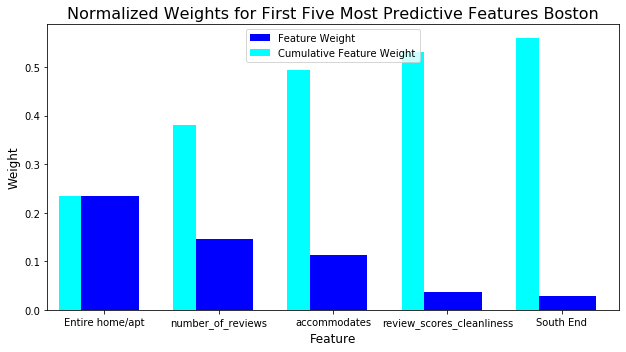

In [206]:
## print the map for Boston
title = "Normalized Weights for First Five Most Predictive Features Boston"
feature_plot(importances, X_train_b, y_train_b, title)


Conclusion
> The five most important predictive features for the price category are not completely the same in Seattle and in Boston and also the ranking is a little bit different.
The two most important features in both areas are the fact that a complete home or apartment is rented and the number of reviews. Only the ranking of these two is different: In Seattle the most important feature is the number of reviews, in Boston the type of property. The two features that are only in the top 5 in one area are the number of bedrooms in Seattle and the reviews of the cleanliness score in Boston. In Seattle the five most important features are resonsible for about 65% of the decision, in boston for only about 55%.


### 4.3 Rental Availability per Month, Weekday


#### 4.3.1 Month

In this part of the analysis, I would like to investigate and compare the monthly availability in the two cities.
I will concatenate the calendarseattle and calendarboston dataframes, but with an extra column to indicate the original dataframe.I will also create an extra column for the year , month and , day

In [207]:
df_calendarseattle['city'] = 'S'


In [208]:
df_calendarseattle.head()


id       date available  price_calendar  price_listing property_type  \
0  241032 2016-01-04         t            85.0           85.0     Apartment   
1  241032 2016-01-05         t            85.0           85.0     Apartment   
2  241032 2016-01-06         f             NaN           85.0     Apartment   
3  241032 2016-01-07         f             NaN           85.0     Apartment   
4  241032 2016-01-08         f             NaN           85.0     Apartment   

   price_adj city  
0       85.0    S  
1       85.0    S  
2       85.0    S  
3       85.0    S  
4       85.0    S

In [209]:
df_calendarseattle.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 0 to 1393569
Data columns (total 8 columns):
id                1393570 non-null object
date              1393570 non-null datetime64[ns]
available         1393570 non-null object
price_calendar    934542 non-null float64
price_listing     1393570 non-null float64
property_type     1393205 non-null object
price_adj         1393570 non-null float64
city              1393570 non-null object
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 95.7+ MB


In [210]:
df_calendarboston['city'] = 'B'

In [211]:
df_calendarboston.head()

id       date available  price_calendar  price_listing property_type  \
0  12147973 2017-09-05         f             NaN          250.0         House   
1  12147973 2017-09-04         f             NaN          250.0         House   
2  12147973 2017-09-03         f             NaN          250.0         House   
3  12147973 2017-09-02         f             NaN          250.0         House   
4  12147973 2017-09-01         f             NaN          250.0         House   

   price_adj city  
0      250.0    B  
1      250.0    B  
2      250.0    B  
3      250.0    B  
4      250.0    B

In [212]:
df_calendar = pd.concat([df_calendarseattle, df_calendarboston], ignore_index=True)


In [213]:
df_calendar['weekday'] = df_calendar['date'].dt.dayofweek

In [214]:
df_calendar['month'] = df_calendar['date'].dt.month

In [215]:
df_calendar['year'] = df_calendar['date'].dt.year

In [216]:
## Check that the new column have been added
df_calendar.head(20)

id       date available  price_calendar  price_listing property_type  \
0   241032 2016-01-04         t            85.0           85.0     Apartment   
1   241032 2016-01-05         t            85.0           85.0     Apartment   
2   241032 2016-01-06         f             NaN           85.0     Apartment   
3   241032 2016-01-07         f             NaN           85.0     Apartment   
4   241032 2016-01-08         f             NaN           85.0     Apartment   
5   241032 2016-01-09         f             NaN           85.0     Apartment   
6   241032 2016-01-10         f             NaN           85.0     Apartment   
7   241032 2016-01-11         f             NaN           85.0     Apartment   
8   241032 2016-01-12         f             NaN           85.0     Apartment   
9   241032 2016-01-13         t            85.0           85.0     Apartment   
10  241032 2016-01-14         t            85.0           85.0     Apartment   
11  241032 2016-01-15         f             NaN           85.0     Apartment   
12  241032 2016-01-16         f             NaN           85.0     Apartment   
13  241032 2016-01-17         f             NaN           85.0     Apartment   
14  241032 2016-01-18         t            85.0           85.0     Apartment   
15  241032 2016-01-19         t            85.0           85.0     Apartment   
16  241032 2016-01-20         t            85.0           85.0     Apartment   
17  241032 2016-01-21         f             NaN           85.0     Apartment   
18  241032 2016-01-22         f             NaN           85.0     Apartment   
19  241032 2016-01-23         f             NaN           85.0     Apartment   

    price_adj city  weekday  month  year  
0        85.0    S        0      1  2016  
1        85.0    S        1      1  2016  
2        85.0    S        2      1  2016  
3        85.0    S        3      1  2016  
4        85.0    S        4      1  2016  
5        85.0    S        5      1  2016  
6        85.0    S        6      1  2016  
7        85.0    S        0      1  2016  
8        85.0    S        1      1  2016  
9        85.0    S        2      1  2016  
10       85.0    S        3      1  2016  
11       85.0    S        4      1  2016  
12       85.0    S        5      1  2016  
13       85.0    S        6      1  2016  
14       85.0    S        0      1  2016  
15       85.0    S        1      1  2016  
16       85.0    S        2      1  2016  
17       85.0    S        3      1  2016  
18       85.0    S        4      1  2016  
19       85.0    S        5      1  2016

In [217]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702460 entries, 0 to 2702459
Data columns (total 11 columns):
id                object
date              datetime64[ns]
available         object
price_calendar    float64
price_listing     float64
property_type     object
price_adj         float64
city              object
weekday           int64
month             int64
year              int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 226.8+ MB


In [218]:

df_calendar['year'].value_counts()


2016    1805496
2017     896964
Name: year, dtype: int64

In [219]:
def prep_data_for_barchart (selector1,selector2):
   
    """
    Input of this function: The city, the function is going to calculate the data for.
    It will calculate the total number rows per month, the total number of rows with availability
    and calculate a  proportion per month. 
    """
    
    ## calculates the totals per month or per weekday (selector 2)
    total_count = df_calendar[df_calendar['city'] == selector1].groupby([selector2])['id'].count()
    ## calculates the availabilities permonth 
    
    detail_count = df_calendar[(df_calendar['city'] == selector1) & (df_calendar['available'] == 't')].groupby([selector2])['id'].count()
   
        
    
    ## calculates the proportion per month
    prop = detail_count / total_count
    return total_count, detail_count,prop
    

In [220]:
def create_barchart (x_axis, y_seattle, y_boston,ticks,title):
    
    width= 0.3
    plt.bar(x_axis, y_seattle, width, color='b', alpha=.7, label='Seattle')
    plt.bar(x_axis + width, y_boston, width, color='c', alpha=.7, label='Boston')
    locations = x_axis + width / 2
    tick_names = ticks 
    plt.xticks(locations, tick_names, fontsize = 13)
    plt.legend(loc=(1.05,0.4), fontsize = 15) 
    plt.title(title, fontsize = 20)          
    plt.ylabel('Availability %', fontsize = 13)
    
    

In [221]:
## calculation of the length of the bars for Seattle by calling 'prepare_data_for_barchart'
selector1 = 'S'
selector2 = 'month'
avg_avail_seattle = prep_data_for_barchart(selector1,selector2)

## calculation of the length of the bars for Boston by calling 'prepare_data_for_barchart'
selector1 = 'B'
selector2 = 'month'
avg_avail_boston = prep_data_for_barchart(selector1,selector2)



In [222]:
## Calucalution of the maximun drop in availability for seattle
max_diff_seattle = avg_avail_seattle[-1].max()-avg_avail_seattle[-1].min()
max_diff_boston = avg_avail_boston[-1].max()-avg_avail_boston[-1].min()


In [223]:
print ("{0:25}{1:.2f}".format("The maximmun drop in availability Seattle : ",max_diff_seattle))

The maximmun drop in availability Seattle : 0.17


In [224]:
print ("{0:25}{1:.2f}".format("The maximmun drop in availability Boston : ",max_diff_boston))

The maximmun drop in availability Boston : 0.26


In [225]:
mont_names = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'AUG',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [226]:
##Overview of the monthly availability
print("AirBnb Availability per Month (2016 - 2017)")
print ("{0:10}{1:5}{2:13}{3:3}".format("Month","Seatlle","","Boston"))
print ("\r")
for month in range(len(avg_avail_seattle[-1])):
    print ("{0:10}{1:.3f}{2:15}{3:.3f}".format(mont_names[month+1],avg_avail_seattle[-1][month + 1]," ",avg_avail_boston[-1][month + 1]))


AirBnb Availability per Month (2016 - 2017)
Month     Seatlle             Boston

Jan       0.567               0.568
Feb       0.662               0.566
Mar       0.709               0.496
Apr       0.664               0.478
May       0.676               0.482
Jun       0.674               0.490
Jul       0.627               0.494
AUG       0.645               0.500
Sep       0.674               0.310
Oct       0.697               0.417
Nov       0.714               0.547
Dec       0.736               0.549


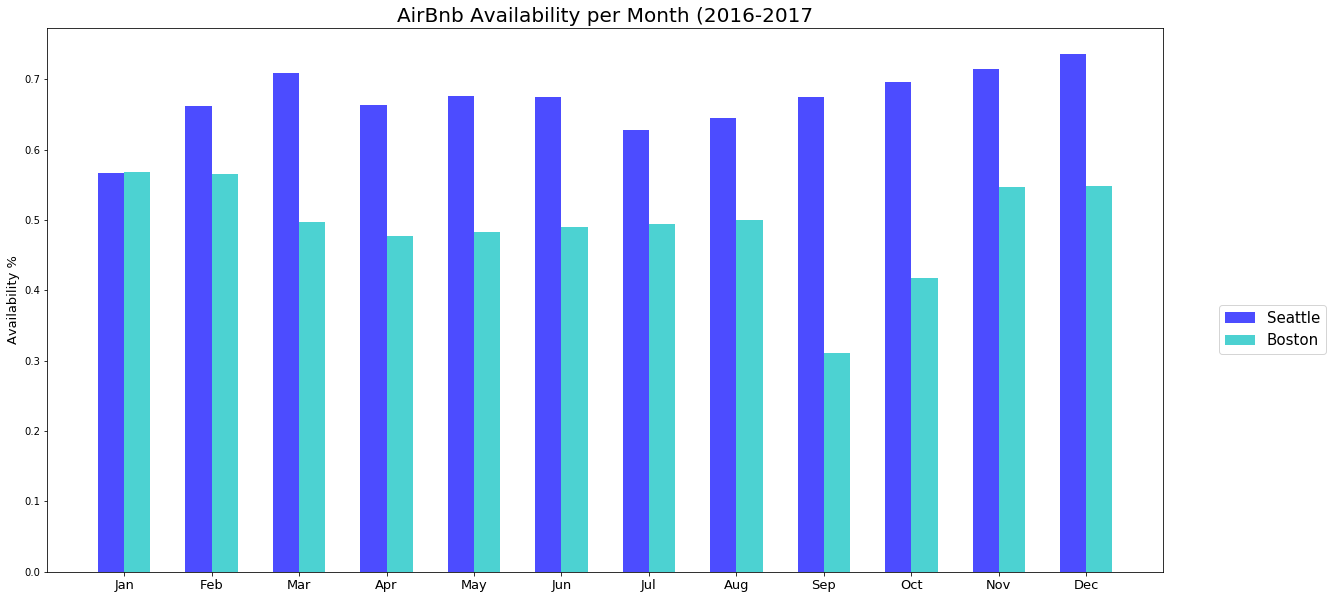

In [227]:
## Print the bar chart by calling the function (create barchart)
## We need only the last element of the tuple generated by the function 'prepare data_for_barchart'
x = np.arange(len(avg_avail_seattle[-1]))## setting the x-axis
fig = plt.figure(figsize = [20,10])
ticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
title = 'AirBnb Availability per Month (2016-2017'
create_barchart(x,avg_avail_seattle[-1],avg_avail_boston[-1], ticks, title)



Conclusion
> The availability patterns in both cities are not the same. In general the availability for Boston is lower than for Seattle, except for January where the availabilty is the same in both cities. The maximum drop in availability is Boston is also more important than in Seattle. The lowest availability in Boston is in September and October, while in Seatlle it seems to be (a little bit surprisingly), January. The highest availability for Boston are the wintermonths November to February.In Seattle, the high availability startsin November, continues in December but ends then in january. March is again a month with high availabiity in Seattle.

#### 4.3.2 Weekday

Which day is the best chance to find a house available and is there any difference between the type of residence ?

In [228]:
## prepare the data for the  rental per weekday Seattle
## Apartment Seattle
selector1 = 'S'
selector2 = 'weekday'
av_weekday_seattle = prep_data_for_barchart(selector1,selector2)



In [229]:
## prepare the data for the rental per weekday Boston
## Apartment Boston
selector1 = 'B'
selector2 = 'weekday'
av_weekday_boston = prep_data_for_barchart(selector1,selector2)


In [230]:
print(av_weekday_boston[-1])

weekday
0    0.495586
1    0.491071
2    0.492385
3    0.489092
4    0.487998
5    0.488374
6    0.494487
Name: id, dtype: float64


In [231]:
weekday_names = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [232]:
##Overview of the monthly availability
print("AirBnb Availability per Weekday (2016 - 2017)")
print ("{0:10}{1:5}{2:13}{3:3}".format("Weekday","Seatlle","","Boston"))
print ("\r")
for day in range(len(av_weekday_seattle[-1])):
    print ("{0:10}{1:.3f}{2:15}{3:.3f}".format(weekday_names[day],av_weekday_seattle[-1][day]," ",av_weekday_boston[-1][day]))


AirBnb Availability per Weekday (2016 - 2017)
Weekday   Seatlle             Boston

Mon       0.671               0.496
Tue       0.672               0.491
Wed       0.672               0.492
Thu       0.670               0.489
Fri       0.669               0.488
Sat       0.668               0.488
Sun       0.673               0.494


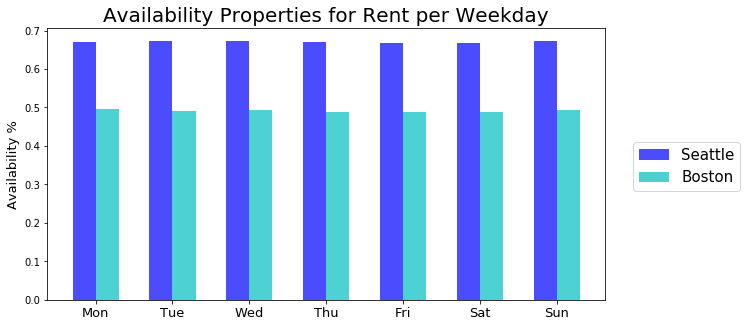

In [233]:
## Print the bar chart by calling the function (create barchart)
## We need only the last element of the tuple generated by the function 'prepare data_for_barchart'
x = np.arange(len(av_weekday_seattle[-1]))## setting the x-axis
ticks = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

fig = plt.figure(figsize = [10,5])

title = 'Availability Properties for Rent per Weekday'
create_barchart(x,av_weekday_seattle[-1],av_weekday_boston[-1],ticks,title)



Conclusion
> The analysis per weekdays shows that there is as good as no difference in availability per weekday. This is true for Seattle and Boston.

## 5 Evaluate 

In this section I will adopt the conclusions already made in part 4 of the notebook 

### 5.1 Geographic Distribution Rental Prices

I have shown with two choropleth maps (see above 4.1) where the most expensive and cheapest neighborhoods are located in both cities. The information for Seattle was based on the zipcode while the information for Boston was more based on 'neighbourhoods'.

***Seattle***
> If a north - south axis would be drawn through the middle of Seattle, one could say that the Airbnb prices for any type of lodging are more expensive to the west of that line than to the east. There is not a single location (zipcode) where this is not the case. The most expensive area is the 98134 area, followed by the areas immediately in the north - west of this area. Strange is also that the most expensive area is adjacent to the cheapest area. One would expect a more gradually transition.

***Boston***
> The most expensive neighborhood to rent something in Boston is clearly on the south bank of the Waterfront and along the Charles River where Beacon Hill is cheaper than Back Bay and West End. With the exception of downtown, Boston's eastern side is less expensive than its western side. The transition from the  most expensive to the cheapest is also more gradual here than in Seattle. The AirBnb area extends far to the south-west, but not far to the north.


### 5.2 Classifier

I made a classifier that will predict one of three price categories based on a number of features. The chosen classifier was the Adaboost classifier. The price categories to be predicted are 'Low' (<= 75), 'Medium' (>75 <= 150) and 'High' > 150)
The following of the 92 features were kept in the model: review_scores_cleanliness, cancellation_policy, zipcode, neighbourhood_cleansed, accomodates, bedrooms, bathrooms,room_type,property_type.

The label was the price category.



***Accuracy and F-Score***
> The accurracy score for Seattle was 0.74 and 0.70 for Boston

> The F- score for Seattle was 0.73 and 0.69 for Boston



***Feature importance***
> The five most important predictive features for the price category are not completely the same in Seattle and in Boston and also the ranking is a little bit different.
The two most important features in both areas are the fact that a complete home or apartment is rented and the number of reviews. Only the ranking of these two is different: In Seattle the most important feature is the number of reviews, in Boston the type of property. The two features that are only in the top 5 in one area and not in the other,are the number of bedrooms in Seattle and the reviews of the cleanliness score in Boston. The only feature that is exactly in the same position in the features ranking (nr 5) is a specific location. As said before, in Seattle is this a zipcode are, in Boston a neighbourhood.
In Seattle the five most important features are resonsible for about 65% of the decision, in boston for only about 55%.





### 5.3 Monthly and Weekday Analysis Available Houses


> The montly availability patterns in both cities are not the same. In general the availability for Boston is lower than for Seattle, except for January where the availabilty is the same in both cities. The maximum drop in availability in Boston (26%) is also more important than in Seattle (17%). The lowest availability in Boston is in September and October, while in Seatlle it seems to be (a little bit surprisingly), January. The highest availability for Boston are the wintermonths November to February.In Seattle, the high availability starts in November, continues in December but ends then in january. March is again a month with high availabiity in Seattle.

> The availability per weekday is not significantly different from day to day